## Nepal Dataset

## Data Description


    geo_level_1_id, geo_level_2_id, geo_level_3_id (type: categorical): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3).
    count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
    age_building (type: int): age of the building.
    plinth_area_sq_ft_percentage (type: float): plinth area of the building described as the percentage of all buildings' areas.
    height_ft_pre_eq_percentage (type: float): height of the building described as the percentage of all buildings' heights.
    land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: d502, 808e, 2f15.
    foundation_type (type: categorical): type of foundation used while building. Possible values: 337f, 858b, 6c3e, 467b, bb5f.
    roof_type (type: categorical): type of roof used while building. Possible values: 7e76, e0e2, 67f9.
    ground_floor_type (type: categorical): type of the ground floor. Possible values: b1b4, b440, 467b, e26c, bb5f.
    other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: f962, 9eb0, 441a, 67f9.
    position (type: categorical): position of the building. Possible values: 3356, bfba, bcab, 1787.
    plan_configuration (type: categorical): building plan configuration. Possible values: a779, 84cf, 8e3f, d2d9, 3fee, 6e81, 0448, 1442, cb88.
    has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
    has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
    has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
    has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
    has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
    has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
    has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
    has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
    has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
    has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
    has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
    legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: c8e1, cae1, ab03, bb5f.
    count_families (type: float): number of families that live in the building.
    has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
    has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
    has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
    has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
    has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
    has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
    has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
    has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
    has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
    has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
    has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.


Based on aspects of building location and construction, your goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

<h3>Target variable</h3>

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

<li>1 represents low damage</li>
<li>2 represents a medium amount of damage</li>
<li>3 represents almost complete destruction</li>




## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import sem
from scipy.stats import t
from numpy import mean
from math import sqrt

#from sklearn.preprocessing import StandardScaler  
#from sklearn.pipeline import make_pipeline 
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
#from xgboost import XGBRegressor
#from xgboost import plot_importance

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,1,765,8,501,3237,2,25,33,4,d502,...,0,0,0,0,0,0,0,0,0,2
1,2,9470,7,288,1819,3,15,28,5,d502,...,0,0,0,0,0,0,0,0,0,3
2,3,14461,14,36,838,1,20,37,2,d502,...,1,0,0,0,0,0,0,0,0,2
3,4,9317,8,81,805,2,5,18,3,d502,...,0,0,0,0,0,0,0,0,0,2
4,5,15941,23,380,4266,3,0,39,6,d502,...,0,0,0,0,0,0,0,0,0,3


In [3]:
#What are number of rows and columns
df.shape     
#10000 rows, 41 columns

(10000, 41)

In [4]:
#Are there any suspicious variables?
df.columns.values

array(['Unnamed: 0', 'building_id', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area', 'height',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_timber', 'has_superstructure_bamboo',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary

In [5]:
#Display the variable formats
df.dtypes

Unnamed: 0                                 int64
building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area                                       int64
height                                     int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_m

In [6]:
#Do we have any unique identifier?
df.columns.values
#building_id column is a unique and random identifier

array(['Unnamed: 0', 'building_id', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area', 'height',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_timber', 'has_superstructure_bamboo',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary

In [7]:
df.describe()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,has_superstructure_adobe_mud,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,5000.50000,9987.160000,7.135600,296.930300,2678.617900,2.146700,25.393500,38.438100,4.653100,0.089700,...,0.029400,0.006400,0.00070,0.00070,0.000800,0.000200,0.000200,0.0001,0.005300,2.248800
std,2886.89568,5800.800829,6.225567,279.390651,2520.663769,0.736365,64.482893,21.265883,1.792842,0.285766,...,0.168933,0.079748,0.02645,0.02645,0.028274,0.014141,0.014141,0.0100,0.072612,0.611993
min,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,2500.75000,4998.750000,2.000000,60.000000,606.750000,2.000000,10.000000,26.000000,4.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,2.000000
50%,5000.50000,9963.500000,6.000000,219.000000,1937.500000,2.000000,15.000000,34.000000,5.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,2.000000
75%,7500.25000,15044.750000,10.000000,466.000000,4158.000000,3.000000,30.000000,44.000000,5.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,3.000000
max,10000.00000,19999.000000,30.000000,1411.000000,12151.000000,9.000000,995.000000,425.000000,30.000000,1.000000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.0000,1.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
Unnamed: 0                                10000 non-null int64
building_id                               10000 non-null int64
geo_level_1_id                            10000 non-null int64
geo_level_2_id                            10000 non-null int64
geo_level_3_id                            10000 non-null int64
count_floors_pre_eq                       10000 non-null int64
age                                       10000 non-null int64
area                                      10000 non-null int64
height                                    10000 non-null int64
land_surface_condition                    10000 non-null object
foundation_type                           10000 non-null object
roof_type                                 10000 non-null object
ground_floor_type                         10000 non-null object
other_floor_type                          10000 non-null object
posit

In [9]:
#Find the frequencies of all class variables in the data 
df['building_id'].value_counts(sort=False)

16384    1
18433    1
4098     1
6147     1
12294    1
14343    1
16392    1
18441    1
2049     1
19134    1
12302    1
14351    1
16       1
18449    1
6163     1
10261    1
12310    1
18694    1
24       1
6171     1
10269    1
1456     1
16416    1
18465    1
6179     1
12326    1
14375    1
18473    1
4138     1
12334    1
        ..
8148     1
4054     1
18391    1
16344    1
10203    1
8156     1
6109     1
4062     1
2015     1
16352    1
14305    1
12258    1
8164     1
17025    1
2023     1
16360    1
14313    1
6125     1
4078     1
2031     1
3320     1
11701    1
8180     1
6133     1
18423    1
16376    1
14329    1
17674    1
8188     1
18431    1
Name: building_id, Length: 10000, dtype: int64

In [10]:
df['geo_level_1_id'].value_counts(sort=False)

0     903
8     559
16    147
24     74
1     842
9     523
17    134
25     41
2     860
10    367
18    102
26     47
3     843
11    304
19    102
27     37
4     730
12    292
20    121
28     19
5     751
13    256
21     98
29     13
6     683
14    194
22     97
30      7
7     617
15    147
23     90
Name: geo_level_1_id, dtype: int64

In [11]:
df['geo_level_2_id'].value_counts(sort=False)

0       157
8        71
16       38
24       43
32       31
40       21
48       24
56       26
64       23
72       20
80       20
88       19
96       18
104      16
112      16
120      16
128      14
136      14
144       9
152      21
160      12
168      15
176      15
184      18
192       8
200      15
208      10
216      10
224      13
232      12
       ... 
943       2
951       3
959       1
975       3
983       2
991       1
999       1
1007      1
1015      3
1031      1
1039      1
1047      3
1055      2
1071      1
1079      2
1095      1
1103      1
1127      1
1135      1
1143      1
1159      4
1167      1
1175      1
1199      1
1207      1
1231      1
1239      1
1279      1
1351      1
1359      1
Name: geo_level_2_id, Length: 1137, dtype: int64

In [12]:
df['geo_level_3_id'].value_counts(sort=False)

0        24
2049      2
4098      2
10245     1
8        14
2057      1
6155      1
16       13
2065      1
4114      1
24        9
4122      1
6171      1
32        8
2081      2
4130      1
6179      1
40        6
2089      2
48        7
2097      1
6195      1
56        8
2105      2
6203      2
64        4
4162      2
8260      1
72        3
2121      3
         ..
4006      3
1959      1
8108      2
4014      1
1967      1
6069      1
4022      1
1975      2
4030      2
1983      2
6085      2
4038      1
1991      3
1999      2
8148      1
6101      2
2007      1
10203     1
8156      1
4062      1
2015      2
8164      2
2023      2
4078      2
2031      1
4086      1
2039      1
8188      1
4094      2
2047      2
Name: geo_level_3_id, Length: 5172, dtype: int64

In [13]:
df['count_floors_pre_eq'].value_counts(sort=False)

1    1521
9       1
2    5923
3    2235
4     224
5      87
6       8
7       1
Name: count_floors_pre_eq, dtype: int64

In [14]:
df['age'].value_counts(sort=False)

0       984
40      405
80      111
120       5
200       2
25      999
65       45
105       3
10     1481
50      298
90       38
170       1
35      375
75       21
995      40
20     1236
60      152
100      62
180       1
5      1279
45      185
85       40
125       1
30      688
70       66
110       5
150       5
190       1
15     1373
55       82
95       16
Name: age, dtype: int64

In [15]:
df['area'].value_counts(sort=False)

8        9
16     115
24     365
32     428
40     132
48      93
56     184
64      40
72      19
80      16
88      17
96       5
104      4
112     28
120      2
128      1
136      3
144      2
152      1
160      1
168      1
224      1
9       27
17      91
25     176
33     260
41     150
49      75
57      65
65      81
      ... 
94       9
102     12
110      1
126      2
142      1
150      1
158      1
166      1
270      1
318      1
7        9
15      50
23     291
31     289
39     236
47     114
55      40
63      69
71      20
79      39
87       5
95      16
103      1
111      2
119      3
127      1
135      2
151      1
191      1
207      1
Name: area, Length: 158, dtype: int64

In [16]:
df[(df.area >= 50) & (df.age <=100)].count()

Unnamed: 0                                1913
building_id                               1913
geo_level_1_id                            1913
geo_level_2_id                            1913
geo_level_3_id                            1913
count_floors_pre_eq                       1913
age                                       1913
area                                      1913
height                                    1913
land_surface_condition                    1913
foundation_type                           1913
roof_type                                 1913
ground_floor_type                         1913
other_floor_type                          1913
position                                  1913
plan_configuration                        1913
has_superstructure_adobe_mud              1913
has_superstructure_mud_mortar_stone       1913
has_superstructure_stone_flag             1913
has_superstructure_cement_mortar_stone    1913
has_superstructure_mud_mortar_brick       1913
has_superstru

In [17]:
(df.area).count()

10000

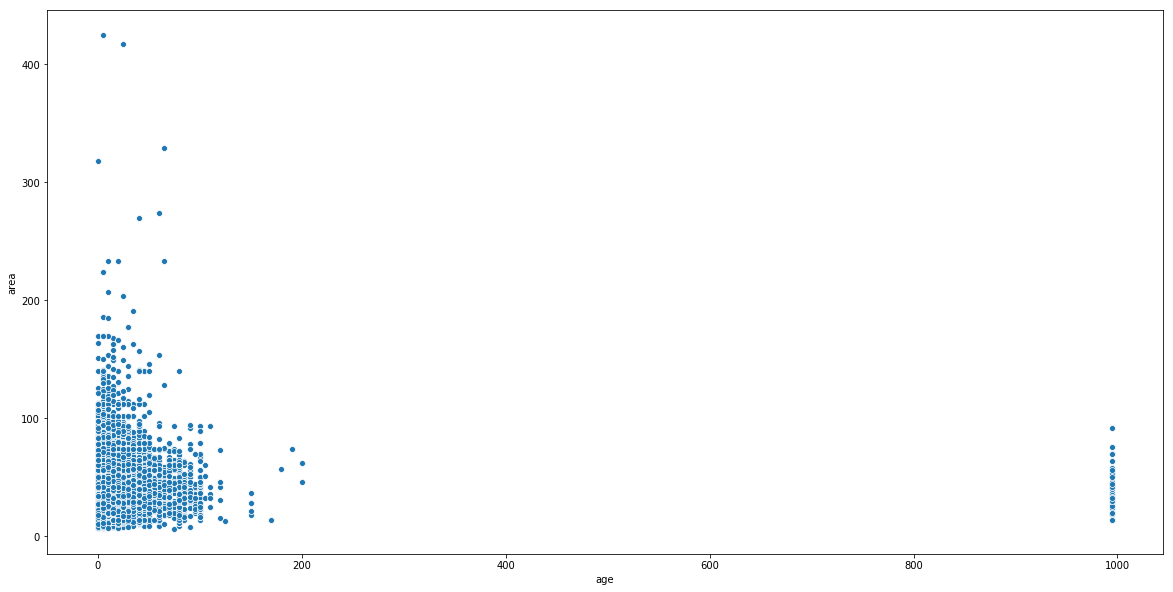

In [18]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='age',y='area',data=df)

In [19]:
df.corr()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,has_superstructure_adobe_mud,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
Unnamed: 0,1.000000,-0.005713,-0.002775,-0.017801,-0.006299,-0.000414,-0.006151,0.005957,-0.000310,-0.001545,...,0.006853,-0.011328,0.016373,-0.004800,-0.004274,0.005431,0.001673,-0.010623,-0.000631,-0.009897
building_id,-0.005713,1.000000,0.002878,-0.000947,-0.005004,-0.004498,0.006636,-0.001351,-0.006189,-0.000454,...,0.011886,-0.002585,0.004984,-0.012803,0.006151,-0.016625,0.003791,0.009496,0.003404,-0.008632
geo_level_1_id,-0.002775,0.002878,1.000000,0.494000,0.497065,0.019658,0.043637,0.022757,-0.017317,0.081308,...,-0.032699,-0.012626,-0.019405,-0.003006,-0.009707,-0.007124,0.023548,-0.006644,0.038454,-0.064084
geo_level_2_id,-0.017801,-0.000947,0.494000,1.000000,0.870383,-0.116855,0.004727,-0.074362,-0.131553,-0.184799,...,-0.069650,-0.050217,-0.009548,-0.006733,-0.012818,-0.004452,-0.006401,0.006553,0.027423,-0.006150
geo_level_3_id,-0.006299,-0.005004,0.497065,0.870383,1.000000,-0.089244,0.017500,-0.063940,-0.108456,-0.135954,...,-0.068820,-0.038971,-0.020463,-0.008539,-0.013161,-0.002374,-0.007778,0.002172,0.025573,-0.006001
count_floors_pre_eq,-0.000414,-0.004498,0.019658,-0.116855,-0.089244,1.000000,0.100241,0.110125,0.771249,0.191729,...,0.070644,0.043618,-0.005273,0.020401,-0.010441,0.006786,0.016390,0.011589,0.006032,0.112296
age,-0.006151,0.006636,0.043637,0.004727,0.017500,0.100241,1.000000,-0.003627,0.079549,0.082724,...,0.003528,-0.010992,-0.006905,-0.005732,-0.006207,-0.004473,-0.004473,0.001490,-0.007601,0.038219
area,0.005957,-0.001351,0.022757,-0.074362,-0.063940,0.110125,-0.003627,1.000000,0.211601,0.051889,...,0.148162,0.098480,0.017057,0.046395,0.015385,0.006360,0.038618,-0.003968,-0.003641,-0.114775
height,-0.000310,-0.006189,-0.017317,-0.131553,-0.108456,0.771249,0.079549,0.211601,1.000000,0.170447,...,0.126465,0.076386,0.017776,0.047302,-0.006362,0.006681,0.026405,0.007513,0.013356,0.031728
has_superstructure_adobe_mud,-0.001545,-0.000454,0.081308,-0.184799,-0.135954,0.191729,0.082724,0.051889,0.170447,1.000000,...,-0.013200,-0.003251,-0.008308,-0.008308,-0.008882,-0.004440,0.020308,-0.003139,-0.018094,0.055371


In [25]:
df[(df.age <=99)].count()  #Total count for ages less than 100

Unnamed: 0                                9874
building_id                               9874
geo_level_1_id                            9874
geo_level_2_id                            9874
geo_level_3_id                            9874
count_floors_pre_eq                       9874
age                                       9874
area                                      9874
height                                    9874
land_surface_condition                    9874
foundation_type                           9874
roof_type                                 9874
ground_floor_type                         9874
other_floor_type                          9874
position                                  9874
plan_configuration                        9874
has_superstructure_adobe_mud              9874
has_superstructure_mud_mortar_stone       9874
has_superstructure_stone_flag             9874
has_superstructure_cement_mortar_stone    9874
has_superstructure_mud_mortar_brick       9874
has_superstru

In [26]:
dfage = df[(df.age <=99)]

In [27]:
dfage.head()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,1,765,8,501,3237,2,25,33,4,d502,...,0,0,0,0,0,0,0,0,0,2
1,2,9470,7,288,1819,3,15,28,5,d502,...,0,0,0,0,0,0,0,0,0,3
2,3,14461,14,36,838,1,20,37,2,d502,...,1,0,0,0,0,0,0,0,0,2
3,4,9317,8,81,805,2,5,18,3,d502,...,0,0,0,0,0,0,0,0,0,2
4,5,15941,23,380,4266,3,0,39,6,d502,...,0,0,0,0,0,0,0,0,0,3


In [37]:
dfage['age'].value_counts()

10    1481
15    1373
5     1279
20    1236
25     999
0      984
30     688
40     405
35     375
50     298
45     185
60     152
80     111
55      82
70      66
65      45
85      40
90      38
75      21
95      16
Name: age, dtype: int64

Text(0.5, 1.0, 'Age of the buildings less than 100 years old')

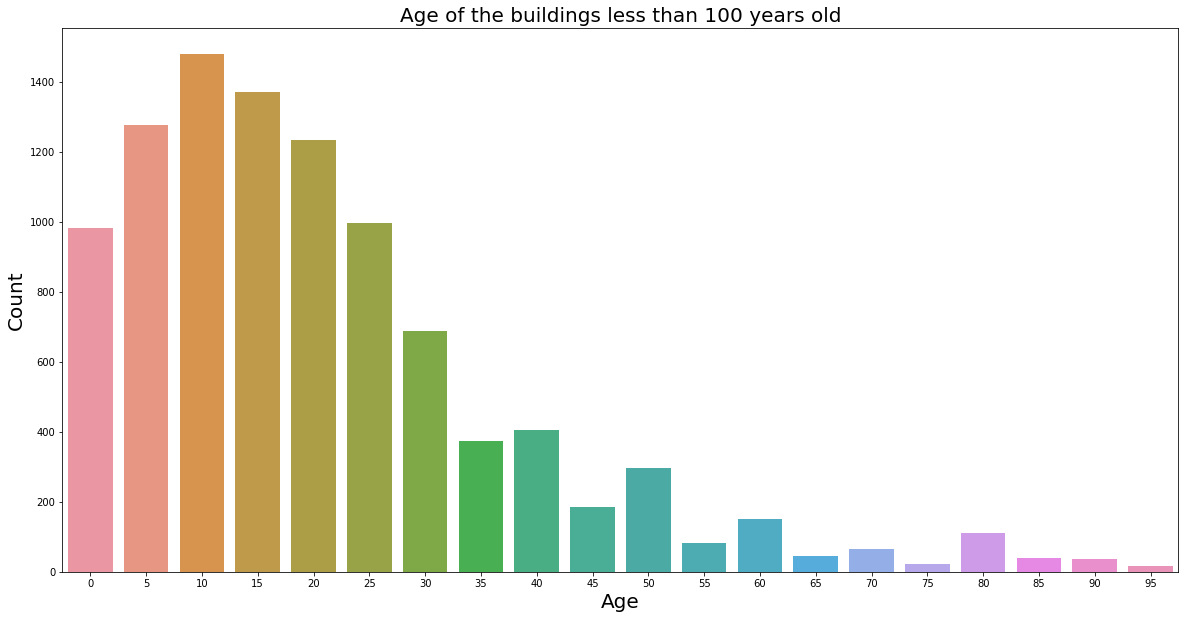

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(dfage['age'])
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)
plt.title('Age of the buildings less than 100 years old', size=20)

Text(0.5, 1.0, 'Damage Grade for the buildings less than 100 years old')

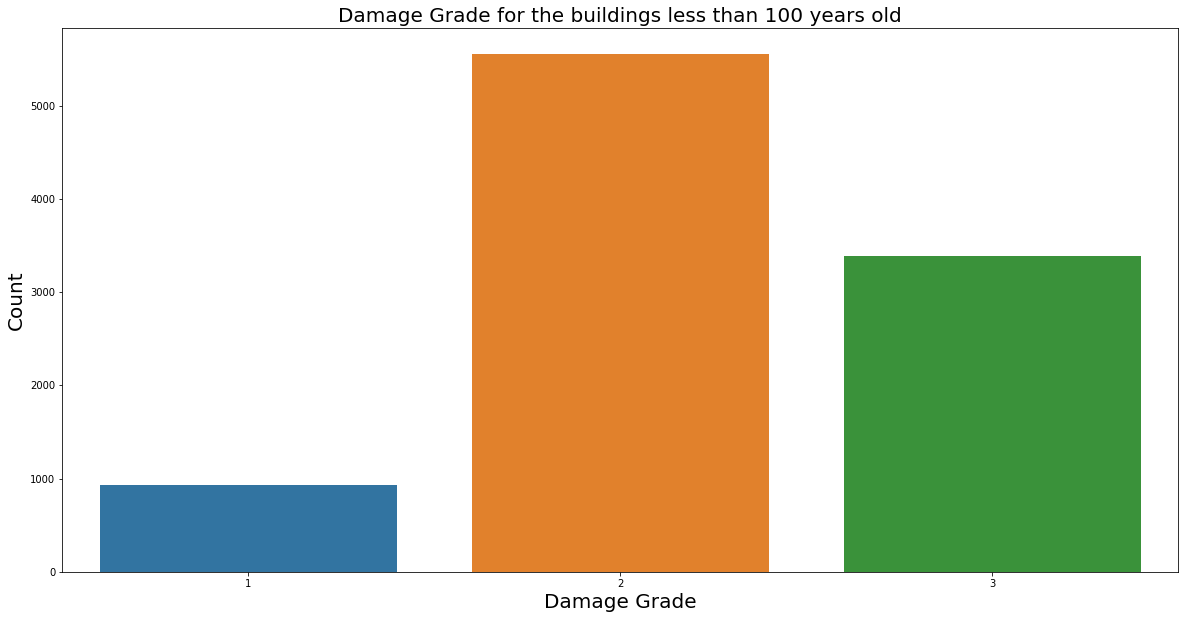

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(dfage['damage_grade'])
plt.xlabel('Damage Grade', size=20)
plt.ylabel('Count', size=20)
plt.title('Damage Grade for the buildings less than 100 years old', size=20)

In [53]:
dfage['damage_grade'].value_counts()

2    5552
3    3387
1     935
Name: damage_grade, dtype: int64

In [54]:
#Need to perform feature selection first
dfagefr = dfage[['age','damage_grade']]

In [55]:
dfagefr.head()

,age,damage_grade
0,25,2
1,15,3
2,20,2
3,5,2
4,0,3


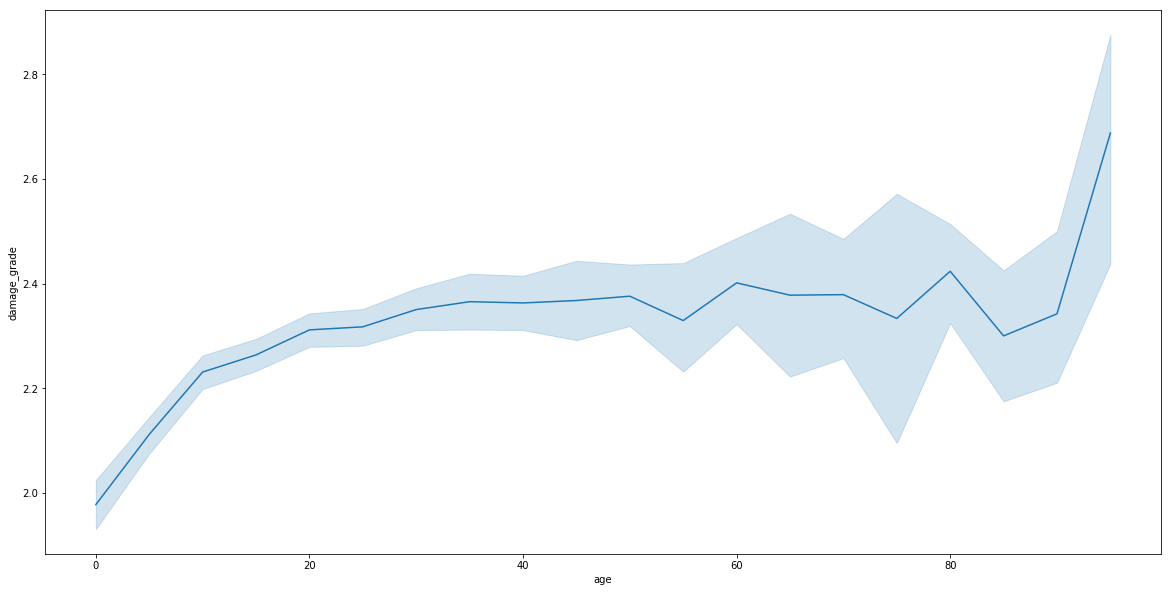

In [70]:
plt.figure(figsize=(20,10))
sns.lineplot(x='age',y='damage_grade',data=dfagefr)

In [42]:
(dfagefr['damage_grade'] == 1).value_counts()

False    8939
True      935
Name: damage_grade, dtype: int64

In [43]:
dmgage1 = dfagefr[(dfagefr['damage_grade'] == 1)] ##Create a new dataframe dmg1(Damage Grade 1)

In [48]:
dmgage1

,age,damage_grade
16,15,1
28,5,1
29,35,1
48,5,1
54,15,1
66,0,1
67,5,1
80,15,1
95,20,1
111,35,1


Text(0.5, 1.0, 'Age Distribution for Damage Grade 1')

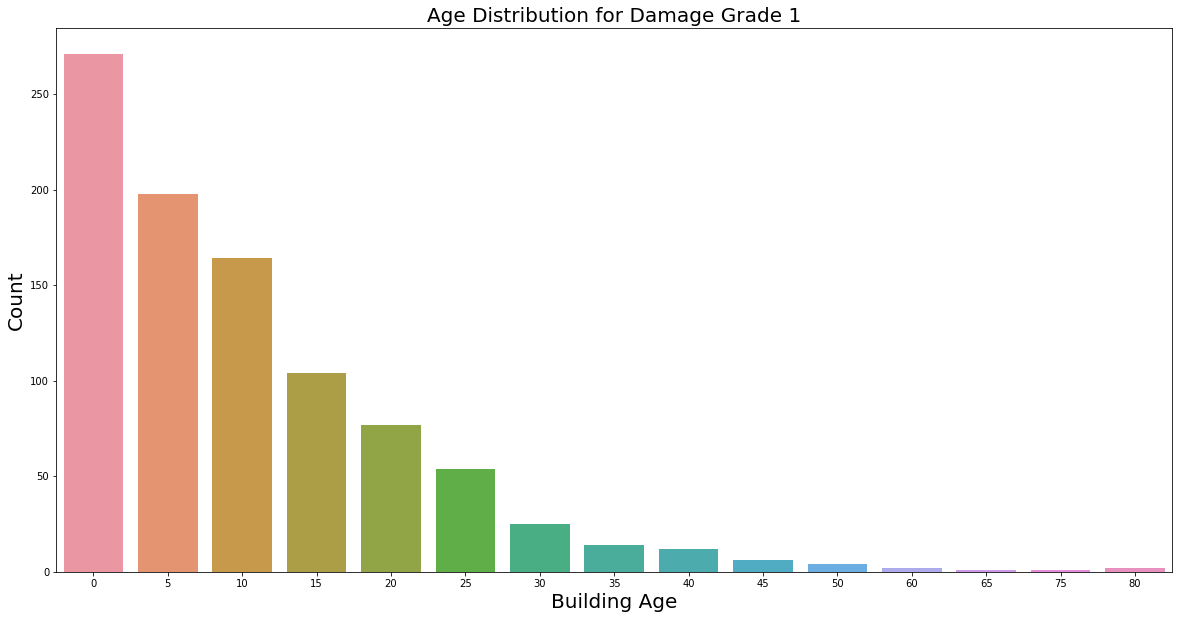

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', data=dmgage1)
plt.xlabel('Building Age', size=20)
plt.ylabel('Count', size=20)
plt.title('Age Distribution for Damage Grade 1', size=20)

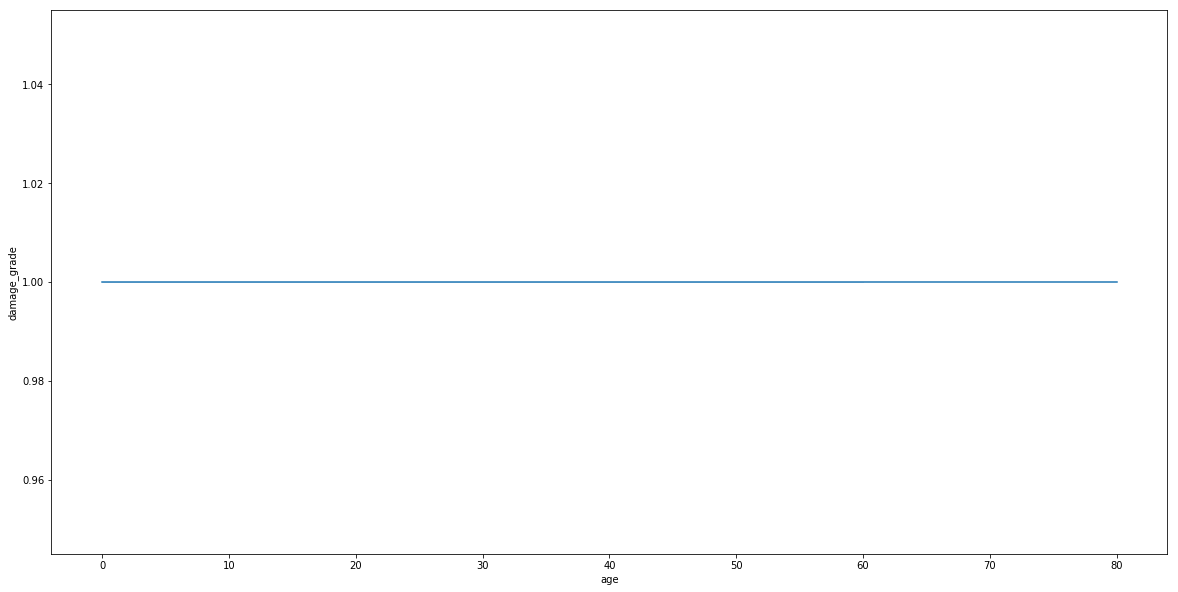

In [69]:
plt.figure(figsize=(20,10))
sns.lineplot(x='age',y='damage_grade',data=dmgage1)

In [56]:
(dfagefr['damage_grade'] == 2).value_counts()

True     5552
False    4322
Name: damage_grade, dtype: int64

In [57]:
dmgage2 = dfagefr[(dfagefr['damage_grade'] == 2)] ##Create a new dataframe dmg2(Damage Grade 2)

In [58]:
dmgage2

,age,damage_grade
0,25,2
2,20,2
3,5,2
5,10,2
6,5,2
8,10,2
10,20,2
11,10,2
12,50,2
18,30,2


In [71]:
dmgage2.age.mean()

21.253602305475503

In [72]:
dmgage2.age.median()

15.0

Text(0.5, 1.0, 'Age Distribution for Damage Grade 2')

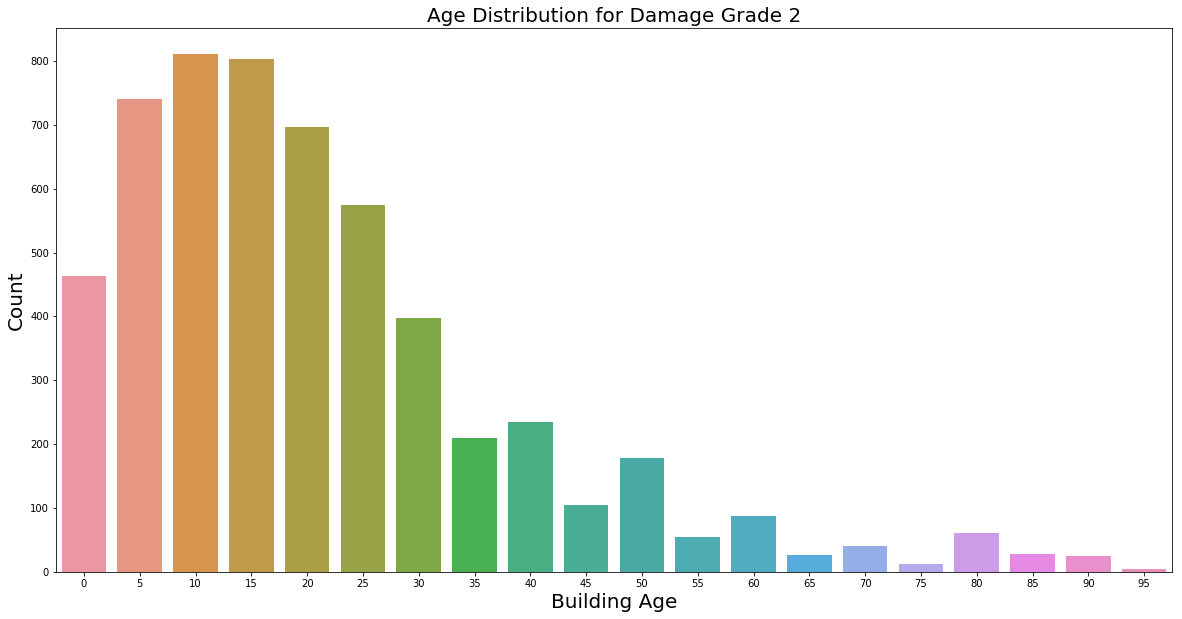

In [59]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', data=dmgage2)
plt.xlabel('Building Age', size=20)
plt.ylabel('Count', size=20)
plt.title('Age Distribution for Damage Grade 2', size=20)

In [60]:
(dfagefr['damage_grade'] == 3).value_counts()

False    6487
True     3387
Name: damage_grade, dtype: int64

In [61]:
dmgage3 = dfagefr[(dfagefr['damage_grade'] == 3)] ##Create a new dataframe dmg3(Damage Grade 3)

In [62]:
dmgage3

,age,damage_grade
1,15,3
4,0,3
7,5,3
9,40,3
13,15,3
14,10,3
15,80,3
17,15,3
21,5,3
24,20,3


In [73]:
dmgage3.age.mean()

22.723649247121347

In [74]:
dmgage3.age.median()

20.0

Text(0.5, 1.0, 'Age Distribution for Damage Grade 3')

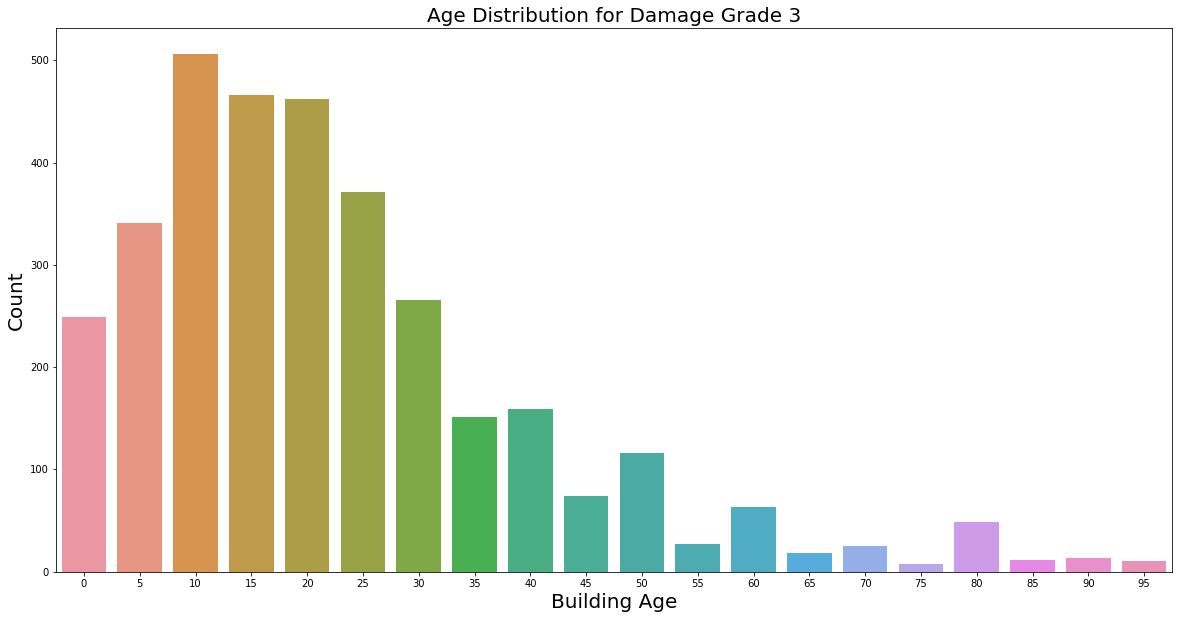

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', data=dmgage3)
plt.xlabel('Building Age', size=20)
plt.ylabel('Count', size=20)
plt.title('Age Distribution for Damage Grade 3', size=20)

In [17]:
df['height'].value_counts(sort=False)

8      216
16       1
24       1
1      123
9      144
2      813
10      53
3     1507
11      43
4     2298
12      42
5     2820
13       4
6     1355
14      11
30       1
7      561
15       7
Name: height, dtype: int64

In [18]:
df['land_surface_condition'].value_counts(sort=False)

d502    8311
808e    1342
2f15     347
Name: land_surface_condition, dtype: int64

In [19]:
df['foundation_type'].value_counts(sort=False)

6c3e     504
bb5f      48
337f    8489
467b     372
858b     587
Name: foundation_type, dtype: int64

In [20]:
df['roof_type'].value_counts(sort=False)

67f9     579
7e76    7007
e0e2    2414
Name: roof_type, dtype: int64

In [21]:
df['ground_floor_type'].value_counts(sort=False)

bb5f      10
467b     875
b1b4    8118
b440     963
e26c      34
Name: ground_floor_type, dtype: int64

In [22]:
df['other_floor_type'].value_counts(sort=False)

67f9     415
441a    1496
f962    6412
9eb0    1677
Name: other_floor_type, dtype: int64

In [23]:
df['position'].value_counts(sort=False)

bfba    1623
bcab     477
1787     108
3356    7792
Name: position, dtype: int64

In [24]:
df['plan_configuration'].value_counts(sort=False)

0448       2
a779    9603
cb88       1
84cf     200
8e3f     158
6e81       6
1442       2
d2d9      15
3fee      13
Name: plan_configuration, dtype: int64

In [5]:
df['has_superstructure_adobe_mud'].value_counts(sort=False)

0    9103
1     897
Name: has_superstructure_adobe_mud, dtype: int64

In [7]:
dmgadobemud = df[df.has_superstructure_adobe_mud == 1]

In [8]:
dmgadobemud['damage_grade'].mean()  #Q16  Mean damage for Adobe/Mud Buildings

2.3567447045707914

In [9]:
dmgnoadobemud = df[df.has_superstructure_adobe_mud == 0]

In [10]:
dmgnoadobemud['damage_grade'].mean() #Mean damage for NON Adobe/Mud Buildings

2.2381632428869604

In [11]:
df['has_superstructure_mud_mortar_stone'].value_counts(sort=False)

0    2374
1    7626
Name: has_superstructure_mud_mortar_stone, dtype: int64

In [12]:
dmgmortarstone = df[df.has_superstructure_mud_mortar_stone == 1]

In [13]:
dmgmortarstone['damage_grade'].mean() #Mean damage for Mud Mortar - Stone Buildings

2.3435615001311305

In [14]:
dmgnomortarstone = df[df.has_superstructure_mud_mortar_stone == 0]

In [15]:
dmgnomortarstone['damage_grade'].mean() #Mean damage for NON Mud Mortar - Stone Buildings

1.9443976411120472

In [16]:
df['has_superstructure_stone_flag'].value_counts(sort=False)

0    9701
1     299
Name: has_superstructure_stone_flag, dtype: int64

In [17]:
dmgstone = df[df.has_superstructure_stone_flag == 1]

In [18]:
dmgstone['damage_grade'].mean()  #Q12  Mean damage for Stone Buildings

2.4247491638795986

In [19]:
dmgnonstone = df[df.has_superstructure_stone_flag == 0]

In [20]:
dmgnonstone['damage_grade'].mean()  #Q14 Mean damage for NON Stone Buildings

2.2433769714462426

In [21]:
df['has_superstructure_cement_mortar_stone'].value_counts(sort=False)

0    9810
1     190
Name: has_superstructure_cement_mortar_stone, dtype: int64

In [22]:
dmgcement = df[df.has_superstructure_cement_mortar_stone == 1]

In [23]:
dmgcement['damage_grade'].mean()  #Mean damage for Cement Mortar - Stone Buildings

1.9263157894736842

In [24]:
dmgnocement = df[df.has_superstructure_cement_mortar_stone == 0]

In [25]:
dmgnocement['damage_grade'].mean() #Mean damage for NON Cement Mortar - Stone Buildings

2.255045871559633

In [26]:
df['has_superstructure_mud_mortar_brick'].value_counts(sort=False)

0    9312
1     688
Name: has_superstructure_mud_mortar_brick, dtype: int64

In [27]:
dmgmortarbrick = df[df.has_superstructure_mud_mortar_brick == 1]

In [28]:
dmgmortarbrick['damage_grade'].mean()  #Q16 Mean damage for Mud Mortar - Brick Buildings

2.255813953488372

In [29]:
dmgnomortarbrick = df[df.has_superstructure_mud_mortar_brick == 0]

In [30]:
dmgnomortarbrick['damage_grade'].mean() #Mean damage for NON Mud Mortar - Brick Buildings

2.2482817869415808

In [31]:
df['has_superstructure_cement_mortar_brick'].value_counts(sort=False)

0    9275
1     725
Name: has_superstructure_cement_mortar_brick, dtype: int64

In [32]:
dmgcementbrick = df[df.has_superstructure_cement_mortar_brick == 1]

In [33]:
dmgcementbrick['damage_grade'].mean()  #Q16 Mean damage for Cement Mortar - Brick Buildings

1.7379310344827585

In [36]:
dmgnocementbrick = df[df.has_superstructure_cement_mortar_brick == 0]

In [37]:
dmgnocementbrick['damage_grade'].mean() #Mean damage for NON Cement Mortar - Brick Buildings

2.288733153638814

In [90]:
print((1.7379310344827585+2.255813953488372)/2)  #Take the AVerage value for bricks

1.9968724939855653


In [38]:
df['has_superstructure_timber'].value_counts(sort=False)

0    7439
1    2561
Name: has_superstructure_timber, dtype: int64

In [39]:
dmgtimber = df[df.has_superstructure_timber == 1]

In [40]:
dmgtimber['damage_grade'].mean()  #Q16 Mean damage for Timber Buildings

2.164779383053495

In [41]:
dmgnotimber = df[df.has_superstructure_timber == 0]

In [42]:
dmgnotimber['damage_grade'].mean() #Mean damage for NON Timber Buildings

2.2777255007393467

In [43]:
df['has_superstructure_bamboo'].value_counts(sort=False)

0    9123
1     877
Name: has_superstructure_bamboo, dtype: int64

In [44]:
dmgbamboo = df[df.has_superstructure_bamboo == 1]

In [45]:
dmgbamboo['damage_grade'].mean()  #Q16 Mean damage for Bamboo Buildings

2.106043329532497

In [46]:
dmgnobamboo = df[df.has_superstructure_bamboo == 0]

In [47]:
dmgnobamboo['damage_grade'].mean() #Mean damage for NON Bamboo Buildings

2.262523292776499

In [48]:
df['has_superstructure_rc_non_engineered'].value_counts(sort=False)

0    9600
1     400
Name: has_superstructure_rc_non_engineered, dtype: int64

In [49]:
dmgnonengine = df[df.has_superstructure_rc_non_engineered == 1]

In [50]:
dmgnonengine['damage_grade'].mean() #Mean damage for non-engineered reinforced concrete Buildings

1.78

In [51]:
dmgnilnonengine = df[df.has_superstructure_rc_non_engineered == 0]

In [52]:
dmgnilnonengine['damage_grade'].mean() #Mean damage for NONE non-engineered reinforced concrete Buildings

2.2683333333333335

In [53]:
df['has_superstructure_rc_engineered'].value_counts(sort=False)

0    9862
1     138
Name: has_superstructure_rc_engineered, dtype: int64

In [54]:
dmgengine = df[df.has_superstructure_rc_engineered == 1]

In [55]:
dmgengine['damage_grade'].mean() #Mean damage for engineered reinforced concrete Buildings

1.318840579710145

In [56]:
dmgnilengine = df[df.has_superstructure_rc_engineered == 0]

In [57]:
dmgnilengine['damage_grade'].mean() #Mean damage for NONE engineered reinforced concrete Buildings

2.2618130196714663

In [58]:
df['has_superstructure_other'].value_counts(sort=False)

0    9859
1     141
Name: has_superstructure_other, dtype: int64

In [59]:
dmgother = df[df.has_superstructure_other == 1]

In [60]:
dmgother['damage_grade'].mean() #Mean damage for any other material Buildings

2.148936170212766

In [61]:
dmgnoother = df[df.has_superstructure_other == 0]

In [62]:
dmgnoother['damage_grade'].mean() #Mean damage for NONE any other material Buildings

2.250228217871995

Text(0.5, 0.98, 'Mean Damage based on building materials')

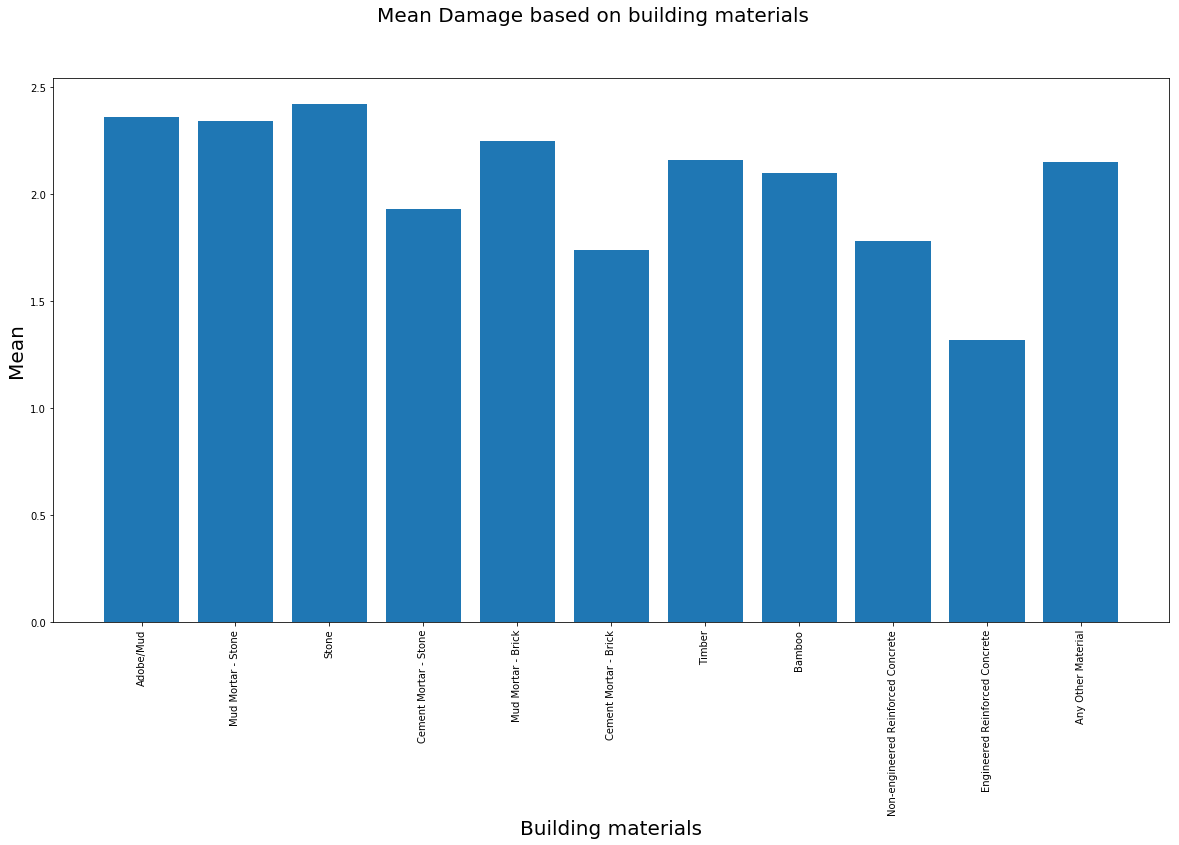

In [9]:
meandmg1 = {'Adobe/Mud': 2.36, 'Mud Mortar - Stone': 2.34, 'Stone': 2.42, 'Cement Mortar - Stone': 1.93, 
        'Mud Mortar - Brick': 2.25, 'Cement Mortar - Brick': 1.74, 'Timber': 2.16, 'Bamboo': 2.10,
        'Non-engineered Reinforced Concrete': 1.78, 'Engineered Reinforced Concrete': 1.32,
        'Any Other Material': 2.15 }
names = list(meandmg1.keys())
values = list(meandmg1.values())
fig, axs = plt.subplots(1, figsize=(20, 10))
axs.bar(names, values)
plt.xticks(rotation=90)
plt.xlabel("Building materials", fontsize=20)
plt.ylabel("Mean", fontsize=20)
fig.suptitle('Mean Damage based on building materials', fontsize=20)

Text(0.5, 0.98, 'Mean Damage based on not used building materials')

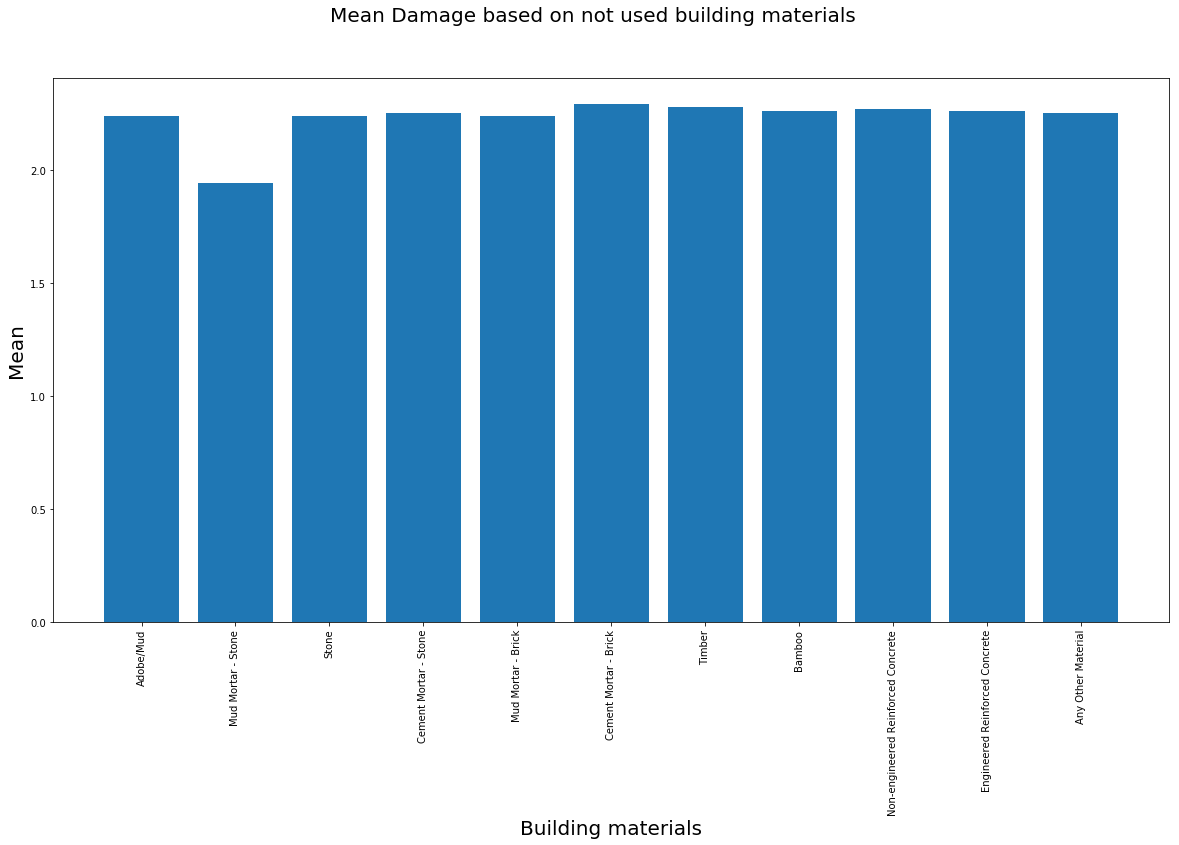

In [10]:
meandmg2 = {'Adobe/Mud': 2.24, 'Mud Mortar - Stone': 1.94, 'Stone': 2.24, 'Cement Mortar - Stone': 2.25, 
        'Mud Mortar - Brick': 2.24, 'Cement Mortar - Brick': 2.29, 'Timber': 2.28, 'Bamboo': 2.26,
        'Non-engineered Reinforced Concrete': 2.27, 'Engineered Reinforced Concrete': 2.26,
        'Any Other Material': 2.25 }
names = list(meandmg2.keys())
values = list(meandmg2.values())
fig, axs = plt.subplots(1, figsize=(20, 10))
axs.bar(names, values)
plt.xticks(rotation=90)
plt.xlabel("Building materials", fontsize=20)
plt.ylabel("Mean", fontsize=20)
fig.suptitle('Mean Damage based on not used building materials', fontsize=20)

Text(0.5, 0.98, 'Building Materials Bar Chart')

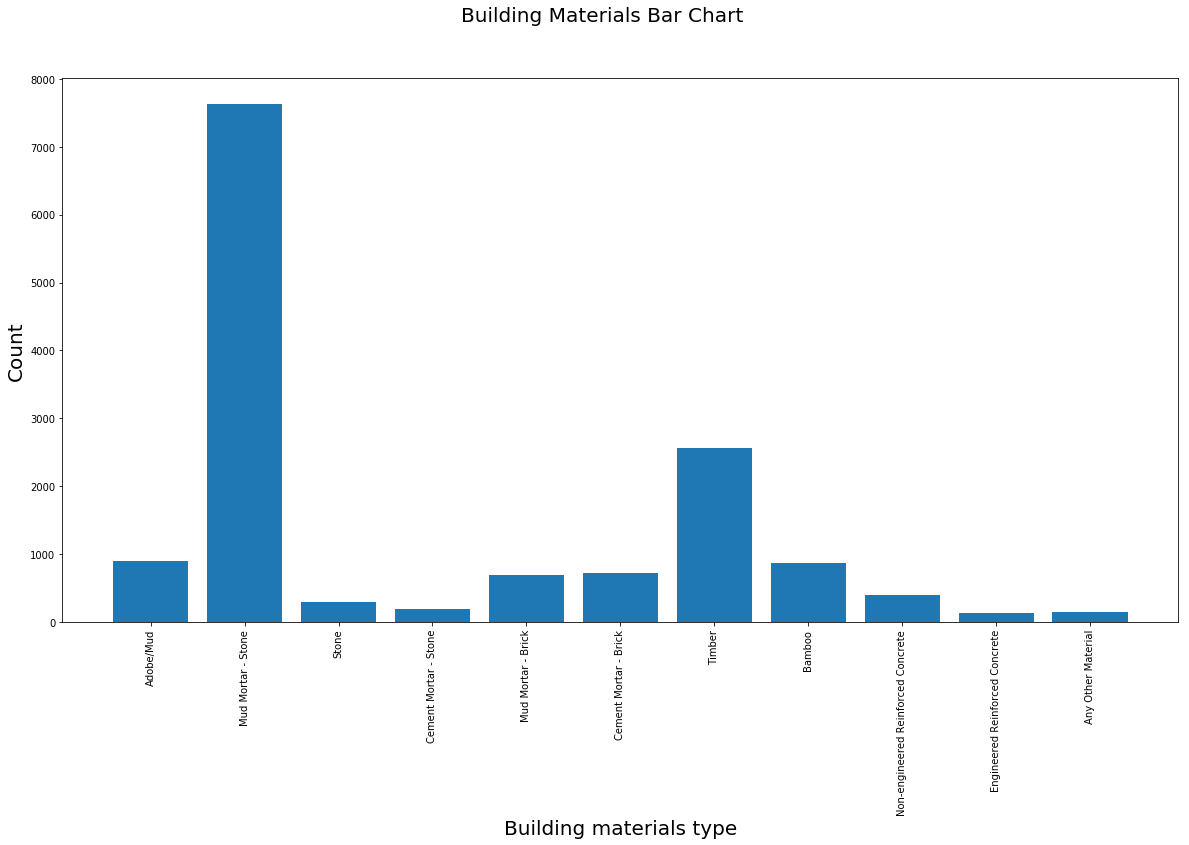

In [6]:
material = {'Adobe/Mud': 897, 'Mud Mortar - Stone': 7626, 'Stone': 299, 'Cement Mortar - Stone': 190, 
        'Mud Mortar - Brick': 688, 'Cement Mortar - Brick': 725, 'Timber': 2561, 'Bamboo': 877,
        'Non-engineered Reinforced Concrete': 400, 'Engineered Reinforced Concrete': 138,
        'Any Other Material': 141 }
names = list(material.keys())
values = list(material.values())
fig, axs = plt.subplots(1, figsize=(20, 10))
axs.bar(names, values)
plt.xticks(rotation=90)
plt.xlabel("Building materials type", fontsize=20)
plt.ylabel("Count", fontsize=20)
fig.suptitle('Building Materials Bar Chart', fontsize=20)

In [63]:
df['legal_ownership_status'].value_counts(sort=False)

c8e1    9627
cae1     214
bb5f      61
ab03      98
Name: legal_ownership_status, dtype: int64

In [64]:
df['count_families'].value_counts(sort=False)

0     803
1    8672
2     433
3      70
4      16
5       3
6       2
7       1
Name: count_families, dtype: int64

In [92]:
df['has_secondary_use'].value_counts(sort=False)

0    8914
1    1086
Name: has_secondary_use, dtype: int64

In [93]:
dmgsecuse1 = df[df.has_secondary_use == 1]

In [94]:
dmgsecuse1['damage_grade'].mean()  #Q17

2.095764272559853

In [95]:
dmgsecuse0 = df[df.has_secondary_use == 0]

In [96]:
dmgsecuse0['damage_grade'].mean()  #Q17

2.2674444693740186

In [39]:
df['has_secondary_use_agriculture'].value_counts(sort=False)

0    9327
1     673
Name: has_secondary_use_agriculture, dtype: int64

In [40]:
df['has_secondary_use_hotel'].value_counts(sort=False)

0    9706
1     294
Name: has_secondary_use_hotel, dtype: int64

In [41]:
df['has_secondary_use_rental'].value_counts(sort=False)

0    9936
1      64
Name: has_secondary_use_rental, dtype: int64

In [42]:
df['has_secondary_use_institution'].value_counts(sort=False)

0    9993
1       7
Name: has_secondary_use_institution, dtype: int64

In [43]:
df['has_secondary_use_school'].value_counts(sort=False)

0    9993
1       7
Name: has_secondary_use_school, dtype: int64

In [44]:
df['has_secondary_use_industry'].value_counts(sort=False)

0    9992
1       8
Name: has_secondary_use_industry, dtype: int64

In [45]:
df['has_secondary_use_health_post'].value_counts(sort=False)

0    9998
1       2
Name: has_secondary_use_health_post, dtype: int64

In [46]:
df['has_secondary_use_gov_office'].value_counts(sort=False)

0    9998
1       2
Name: has_secondary_use_gov_office, dtype: int64

In [47]:
df['has_secondary_use_use_police'].value_counts(sort=False)

0    9999
1       1
Name: has_secondary_use_use_police, dtype: int64

In [48]:
df['has_secondary_use_other'].value_counts(sort=False)

0    9947
1      53
Name: has_secondary_use_other, dtype: int64

## Create a table

In [2]:
# initialize list of lists 
data = [['Adobe/Mud', 2.24, 2.36], ['Mud Mortar - Stone', 1.94, 2.34], ['Stone', 2.24, 2.42],['Cement Mortar - Stone', 2.25, 1.93],['Mud Mortar - Brick', 2.24, 2.25],
        ['Cement Mortar - Brick', 2.29, 1.74],['Timber', 2.28, 2.16],['Bamboo', 2.26, 2.10],['Non-engineered Reinforced Concrete', 2.27, 1.78],['Engineered Reinforced Concrete', 2.26, 1.32],
        ['Any Other Material', 2.25, 2.15]] 
  
# Create the pandas DataFrame 
dfnew = pd.DataFrame(data, columns = ['Material Type', 'Not_Used','Used']) 
  
# print dataframe. 
dfnew 

,Material Type,Not_Used,Used
0,Adobe/Mud,2.24,2.36
1,Mud Mortar - Stone,1.94,2.34
2,Stone,2.24,2.42
3,Cement Mortar - Stone,2.25,1.93
4,Mud Mortar - Brick,2.24,2.25
5,Cement Mortar - Brick,2.29,1.74
6,Timber,2.28,2.16
7,Bamboo,2.26,2.10
8,Non-engineered Reinforced Concrete,2.27,1.78
9,Engineered Reinforced Concrete,2.26,1.32


In [3]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
# calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
# calculate standard errors
    se1, se2 = stats.sem(data1), stats.sem(data2)
# standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
# calculate the t statistic
    t_stat = (mean1 - mean2) / sed
# degrees of freedom
    df = len(data1) + len(data2) - 2
# calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
    return t_stat, df, cv, p

In [4]:
data1 = dfnew['Not_Used']

In [5]:
data1

0     2.24
1     1.94
2     2.24
3     2.25
4     2.24
5     2.29
6     2.28
7     2.26
8     2.27
9     2.26
10    2.25
Name: Not_Used, dtype: float64

In [6]:
data2 = dfnew['Used']

In [7]:
data2

0     2.36
1     2.34
2     2.42
3     1.93
4     2.25
5     1.74
6     2.16
7     2.10
8     1.78
9     1.32
10    2.15
Name: Used, dtype: float64

In [8]:
independent_ttest(data1,data2,0.05)

(1.719910821685185, 20, 1.7247182429207857, 0.10088669099246994)

## What is the highest damage type?

In [49]:
df['damage_grade'].unique()

array([2, 3, 1], dtype=int64)

In [50]:
df['damage_grade'].value_counts()

2    5636
3    3426
1     938
Name: damage_grade, dtype: int64

Text(0.5, 1.0, 'Damage Grade Cases Bar Chart')

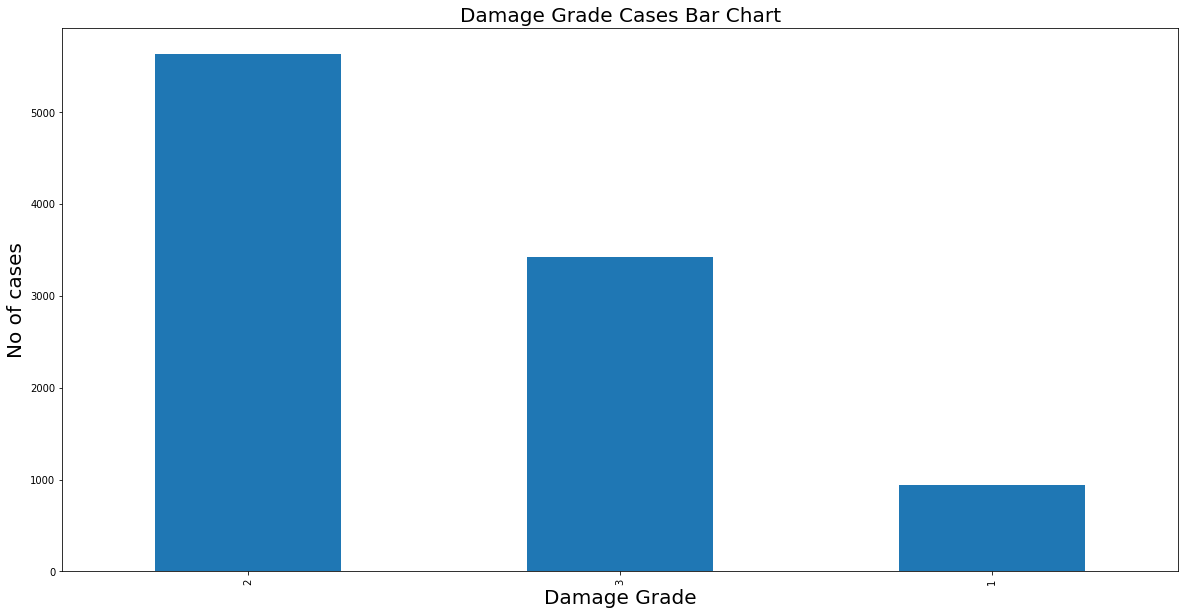

In [6]:
plt.figure(figsize=(20,10))
df['damage_grade'].value_counts().plot.bar()
plt.xlabel('Damage Grade', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Damage Grade Cases Bar Chart', size=20)

## Conclusion Remark: From the bar chart, Damage Grade 2 is the highest count figure about 5636 cases.

Text(0.5, 1.0, 'Damage Grade Distribution')

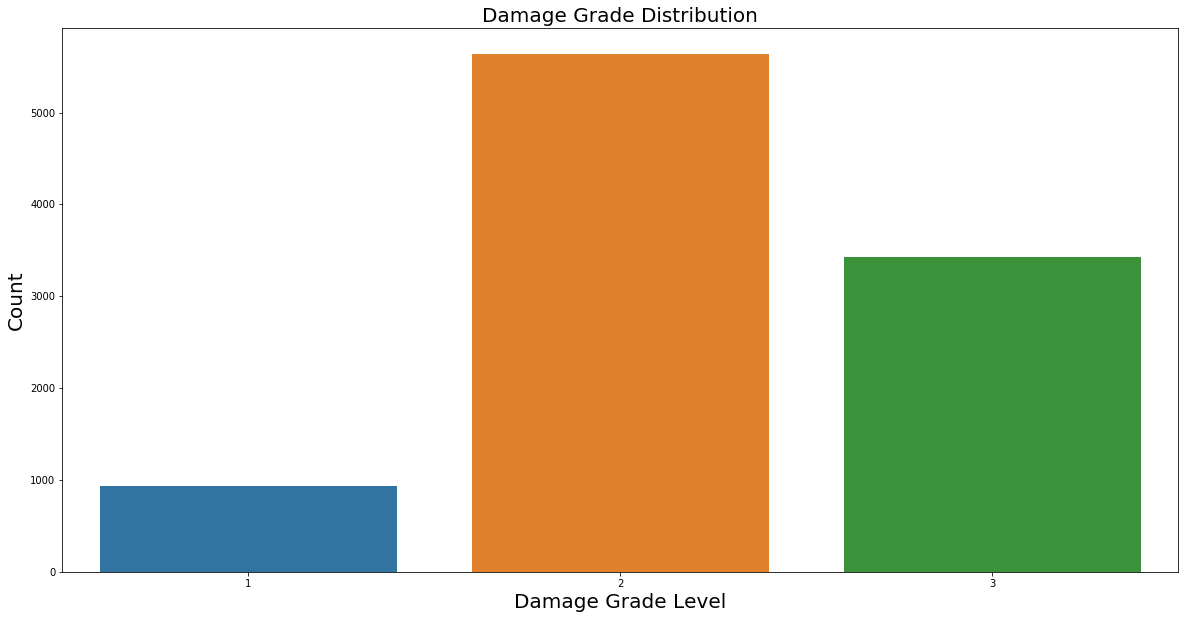

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(df['damage_grade'])
plt.xlabel('Damage Grade Level', size=20)
plt.ylabel('Count', size=20)
plt.title('Damage Grade Distribution', size=20)

Text(0.5, 1.0, 'Geographic region in which building exists')

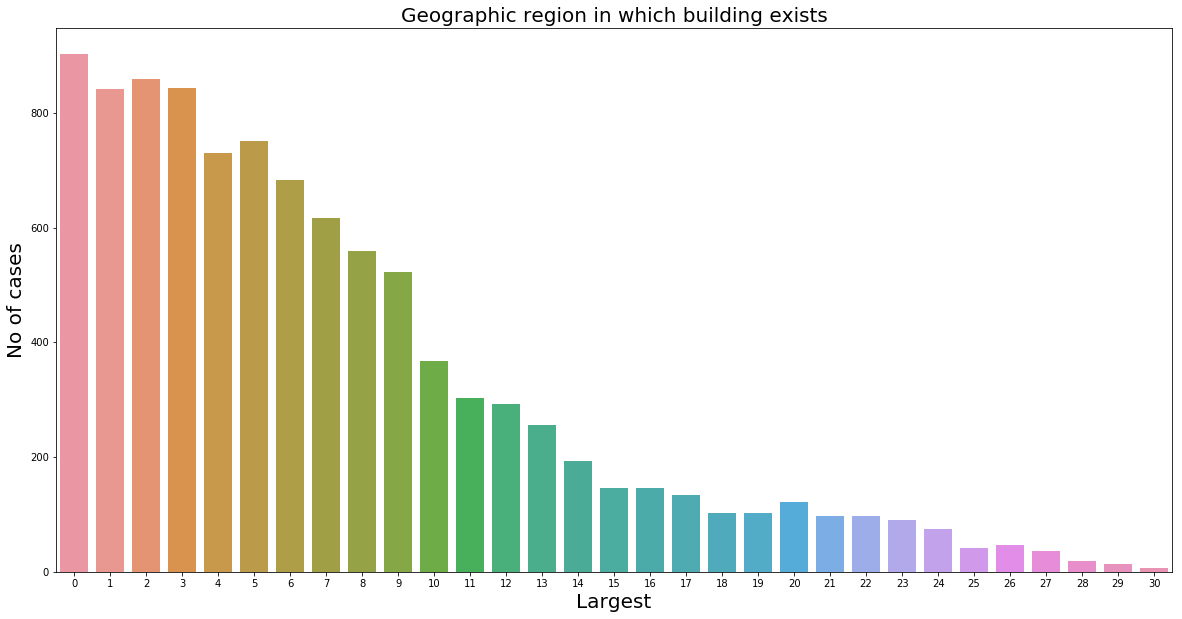

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(df['geo_level_1_id'])
plt.xlabel('Largest', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Geographic region in which building exists', size=20)

Text(0.5, 1.0, 'Geographic region in which building exists')

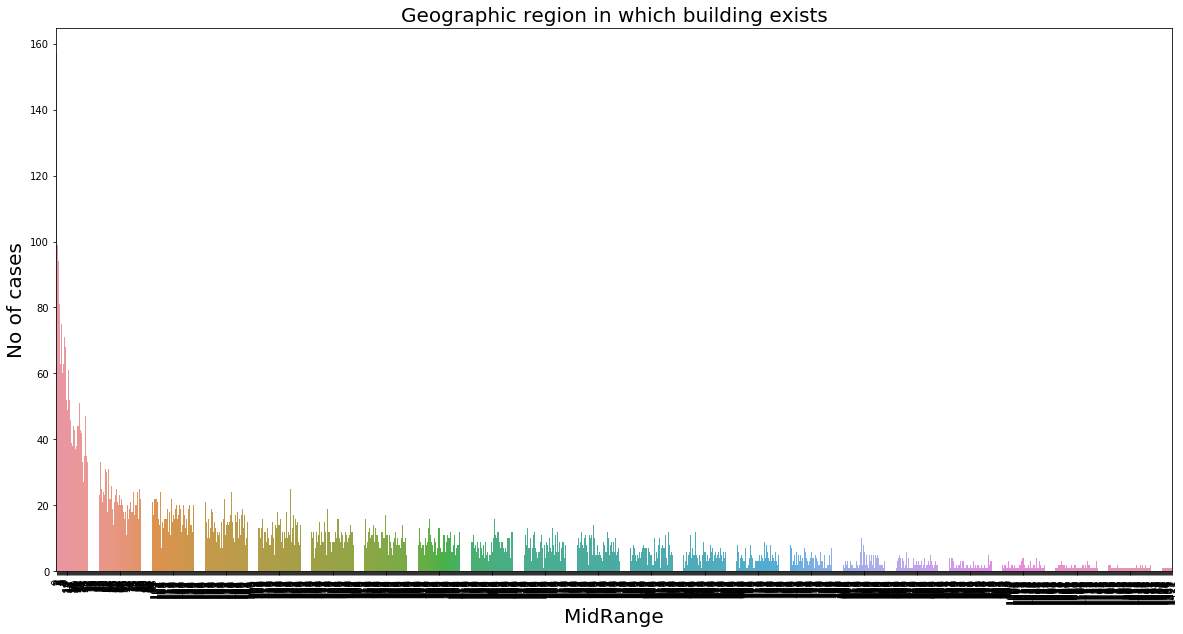

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(df['geo_level_2_id'])
plt.xticks(rotation=90)
plt.xlabel('MidRange', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Geographic region in which building exists', size=20)

Text(0.5, 1.0, 'Geographic region in which building exists')

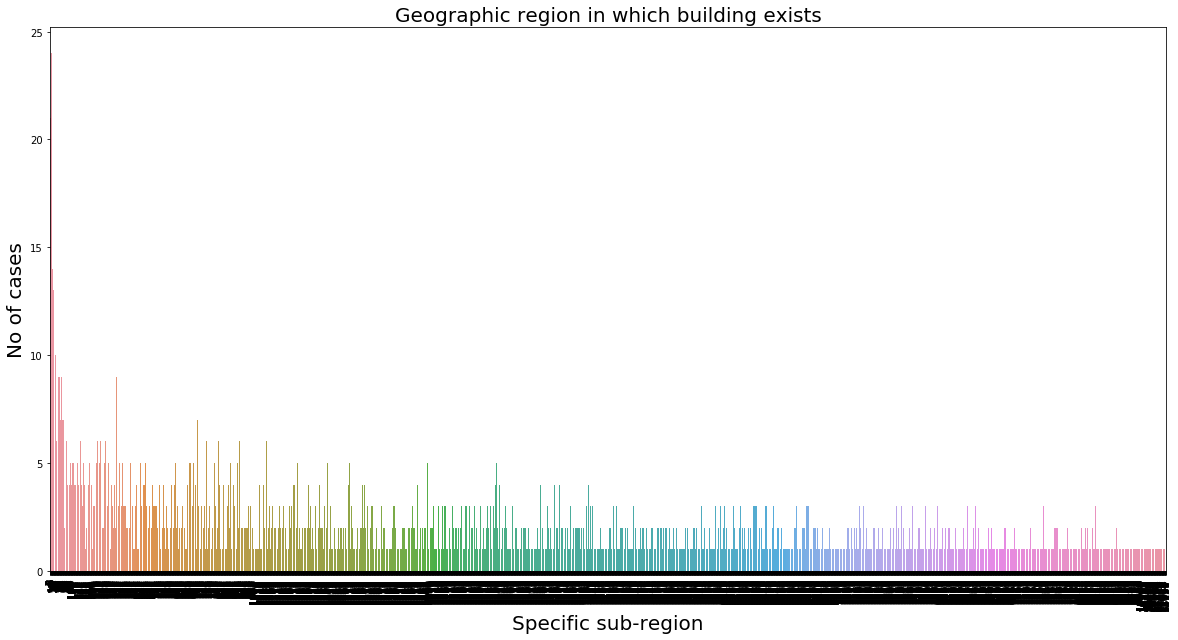

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(df['geo_level_3_id'])
plt.xticks(rotation=90)
plt.xlabel('Specific sub-region', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Geographic region in which building exists', size=20)

Text(0.5, 1.0, 'Number of floors in the building before the earthquake')

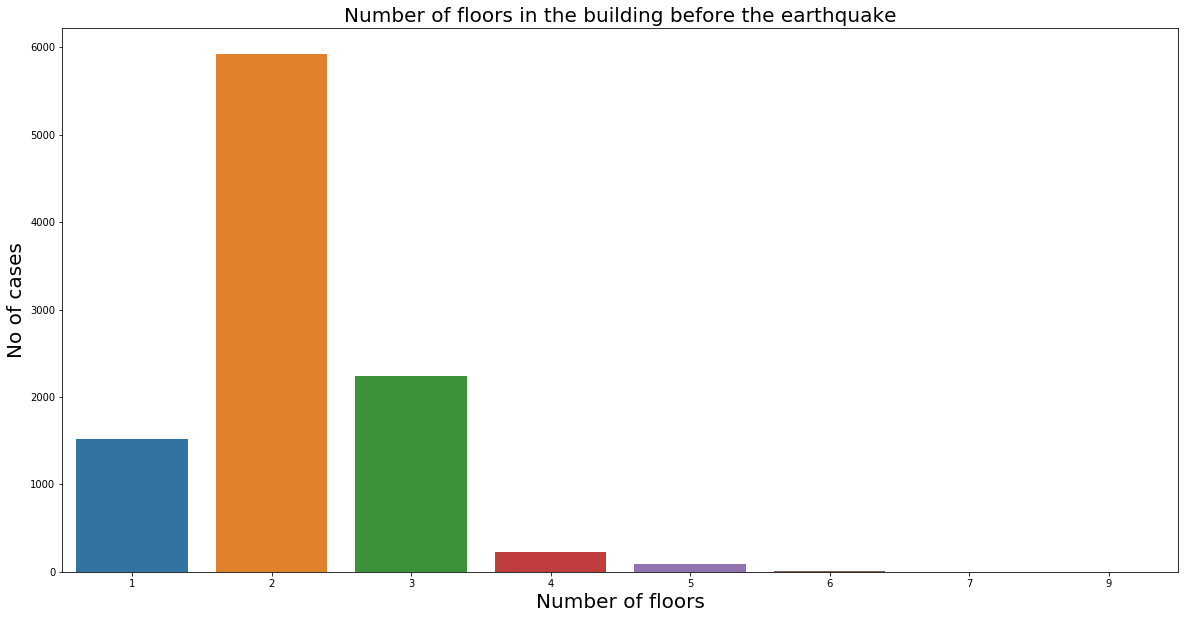

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(df['count_floors_pre_eq'])
plt.xlabel('Number of floors', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Number of floors in the building before the earthquake', size=20)

Text(0.5, 1.0, 'Age of the building')

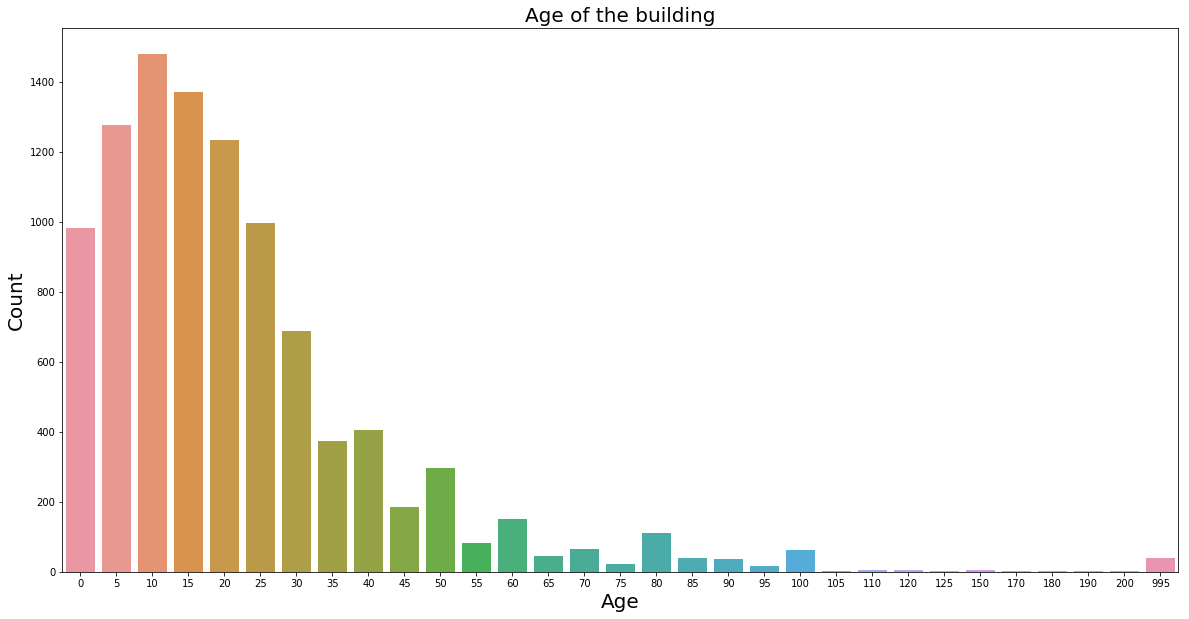

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)
plt.title('Age of the building', size=20)

Text(0.5, 1.0, 'Plinth area of the building described as the percentage of all buildings areas')

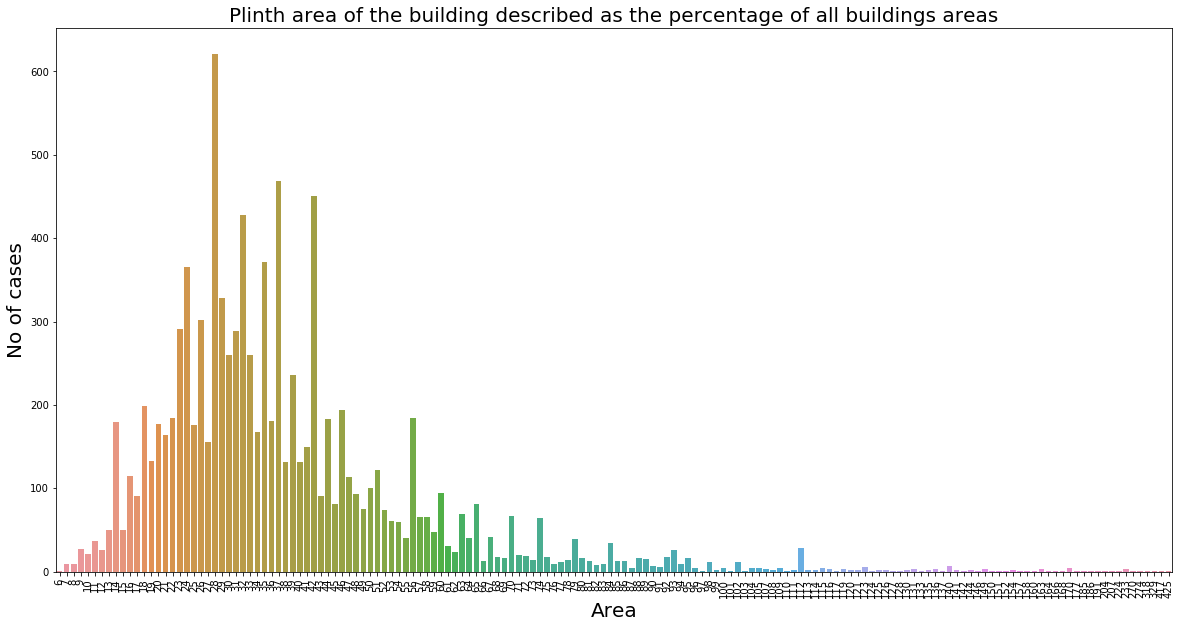

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(df['area'])
plt.xticks(rotation=90)
plt.xlabel('Area', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Plinth area of the building described as the percentage of all buildings areas', size=20)

Text(0.5, 1.0, 'Height of the building described as the percentage of all buildings heights')

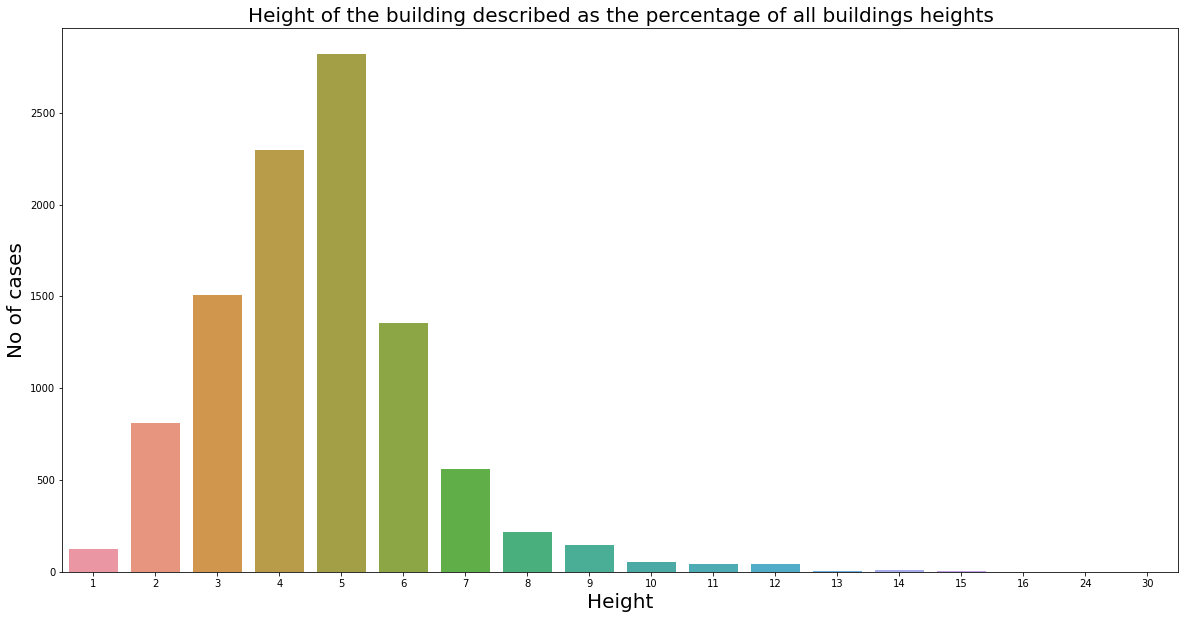

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(df['height'])
plt.xlabel('Height', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Height of the building described as the percentage of all buildings heights', size=20)

Text(0.5, 1.0, 'Surface condition of the land where the building was built')

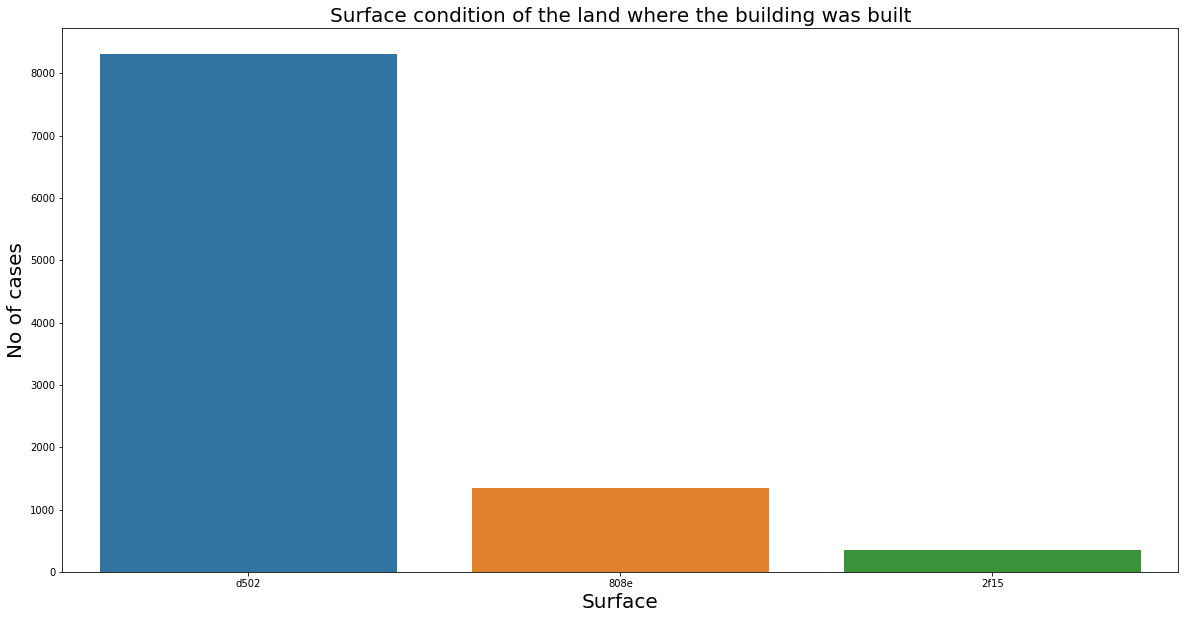

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(df['land_surface_condition'])
plt.xlabel('Surface', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Surface condition of the land where the building was built', size=20)

Text(0.5, 1.0, 'Type of foundation used while building')

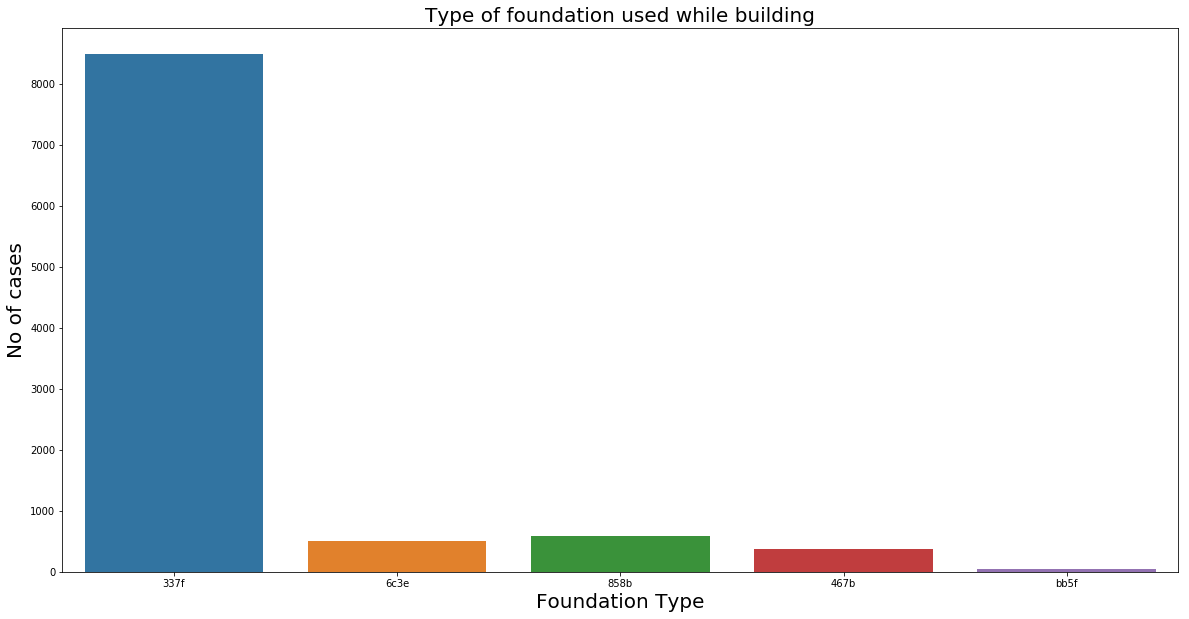

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(df['foundation_type'])
plt.xlabel('Foundation Type', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Type of foundation used while building', size=20)

Text(0.5, 1.0, 'Type of roof used while building')

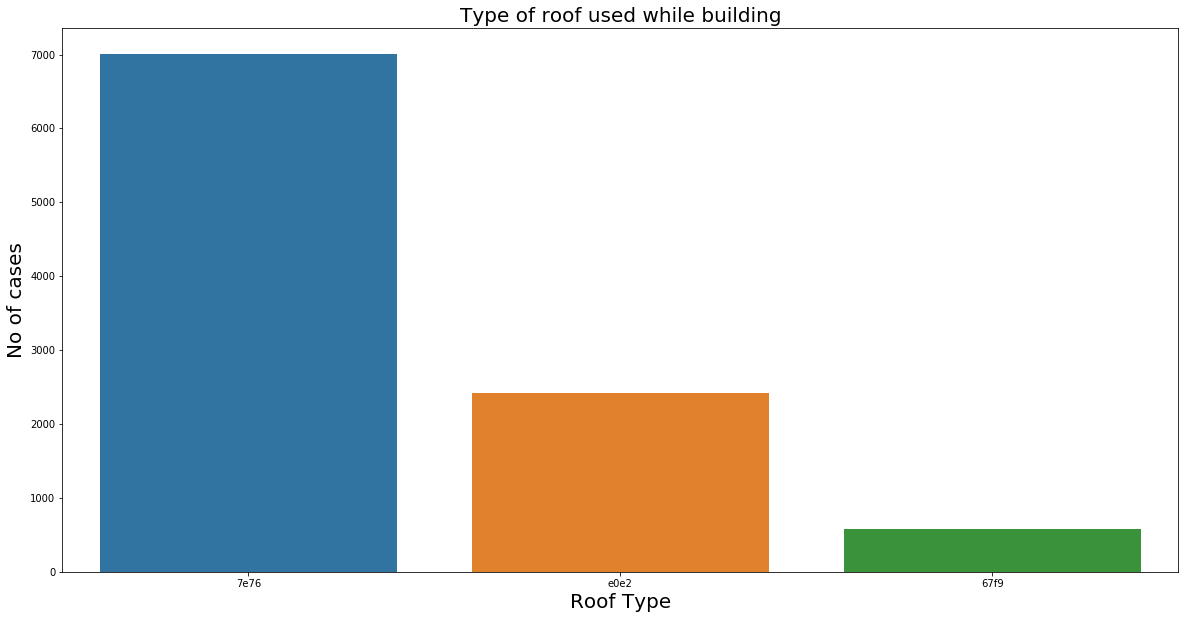

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(df['roof_type'])
plt.xlabel('Roof Type', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Type of roof used while building', size=20)

Text(0.5, 1.0, 'Type of the ground floor')

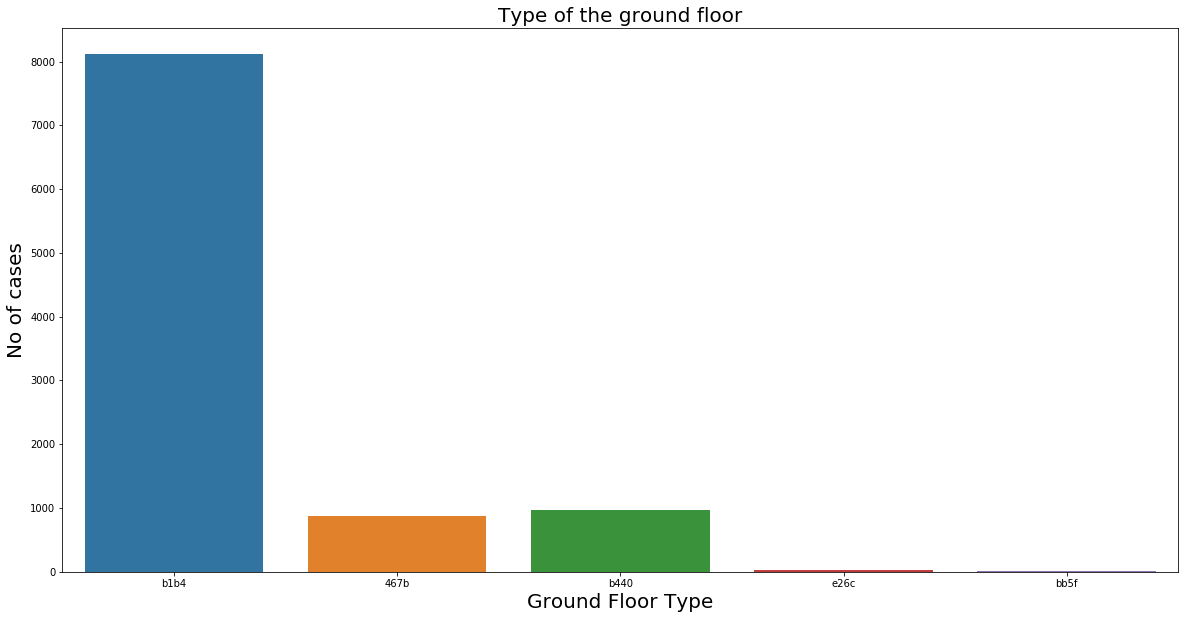

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(df['ground_floor_type'])
plt.xlabel('Ground Floor Type', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Type of the ground floor', size=20)

Text(0.5, 1.0, 'Type of constructions used in higher than the ground floors (except of roof)')

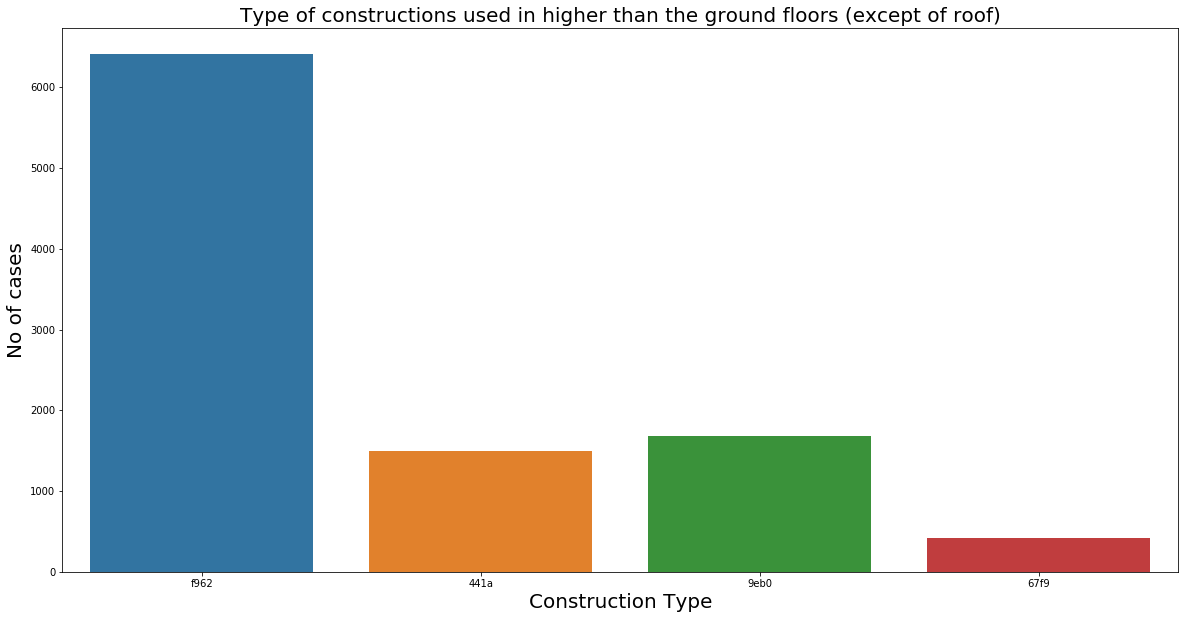

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(df['other_floor_type'])
plt.xlabel('Construction Type', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Type of constructions used in higher than the ground floors (except of roof)', size=20)

Text(0.5, 1.0, 'Position of the building')

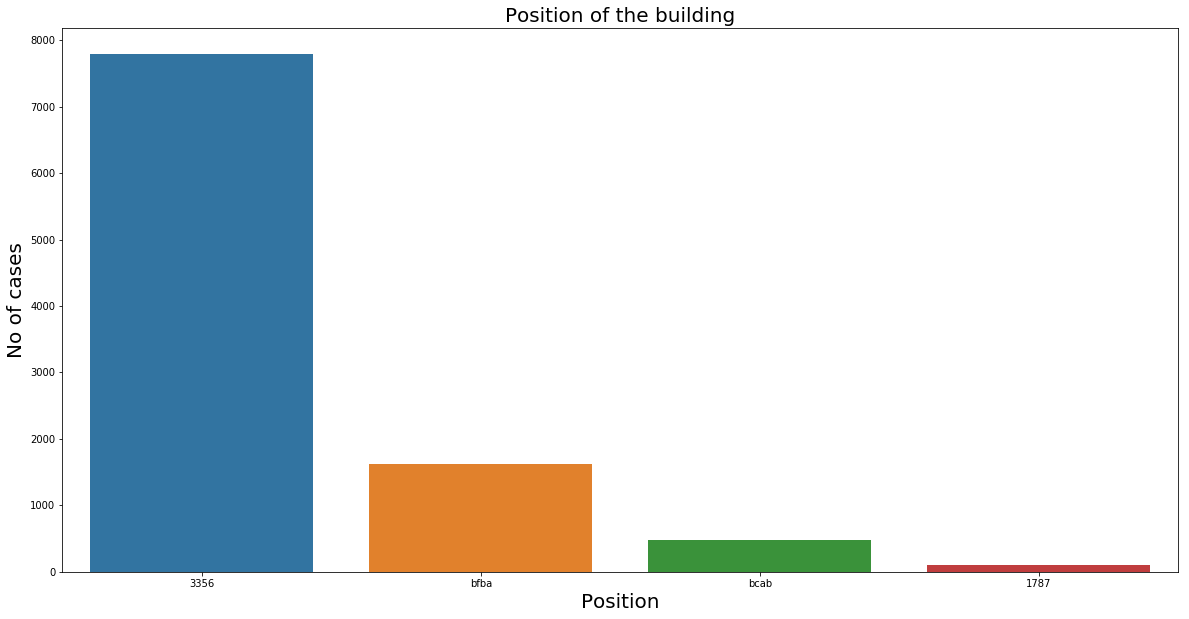

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(df['position'])
plt.xlabel('Position', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Position of the building', size=20)

Text(0.5, 1.0, 'Building plan configuration')

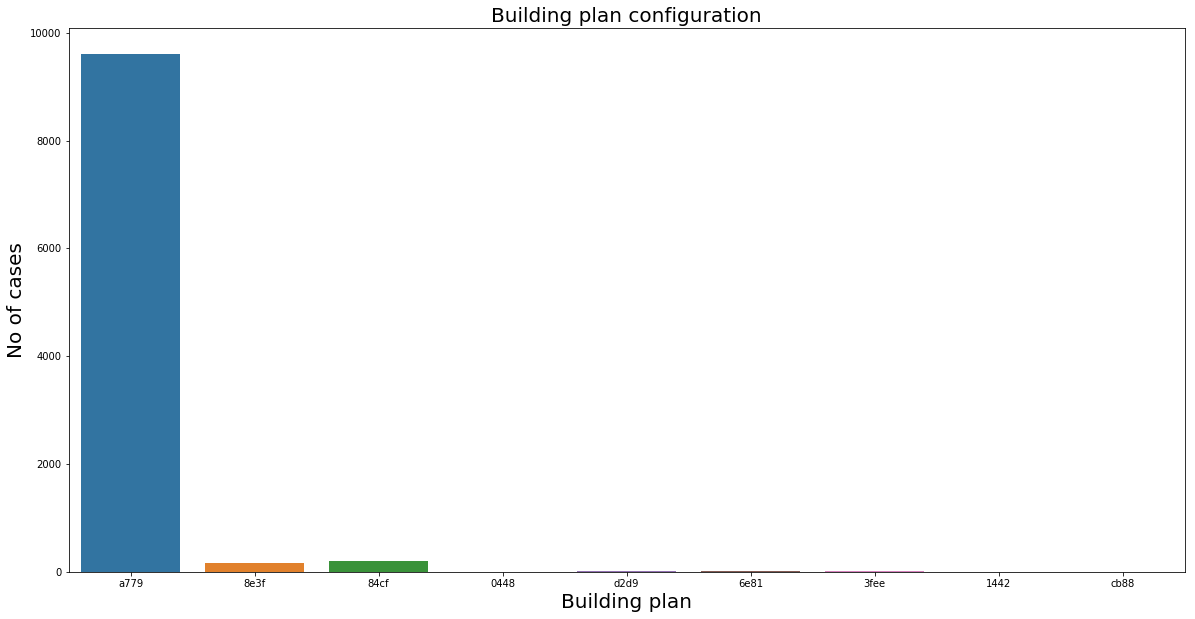

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(df['plan_configuration'])
plt.xlabel('Building plan', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Building plan configuration', size=20)

Text(0.5, 1.0, 'The superstructure was made of Adobe/Mud')

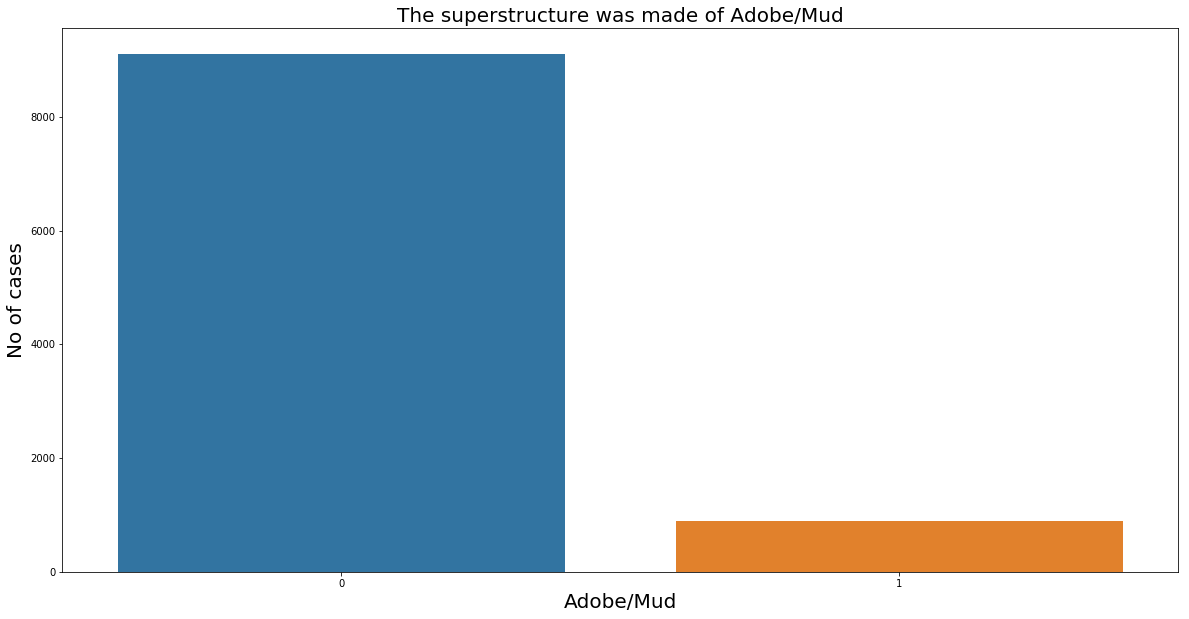

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(df['has_superstructure_adobe_mud'])
plt.xlabel('Adobe/Mud', size=20)
plt.ylabel('No of cases', size=20)
plt.title('The superstructure was made of Adobe/Mud', size=20)

Text(0.5, 1.0, 'Buildings that have a secondary use')

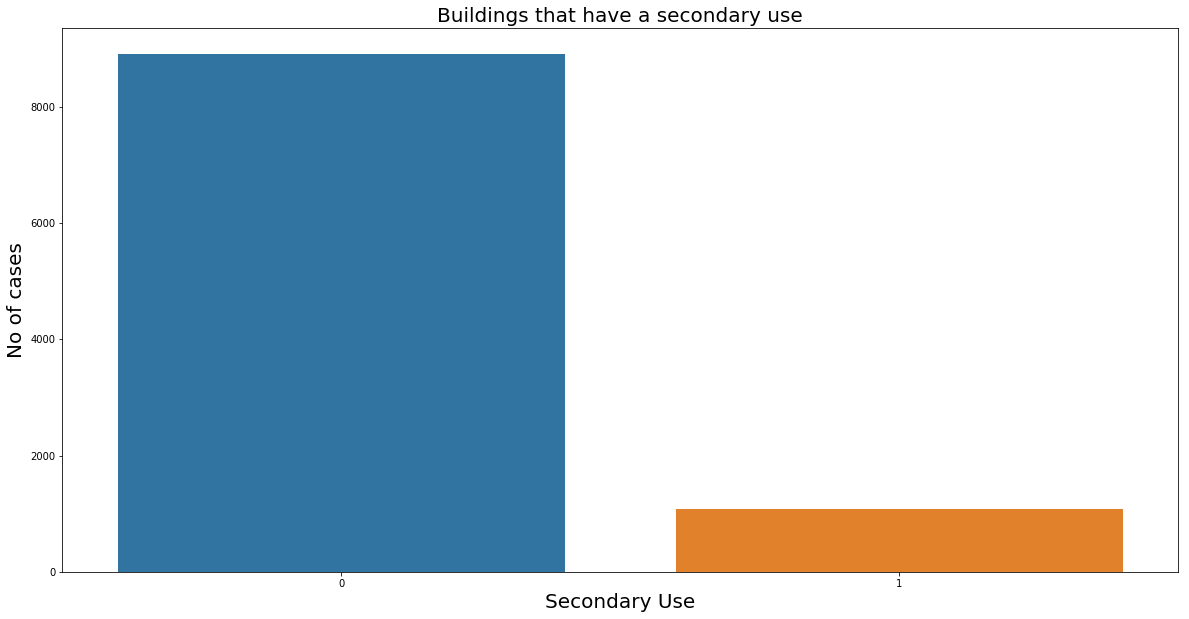

In [91]:
plt.figure(figsize=(20,10))
sns.countplot(df['has_secondary_use'])
plt.xlabel('Secondary Use', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Buildings that have a secondary use', size=20)

Text(0.5, 1.0, 'Legal ownership status of the land where building was built')

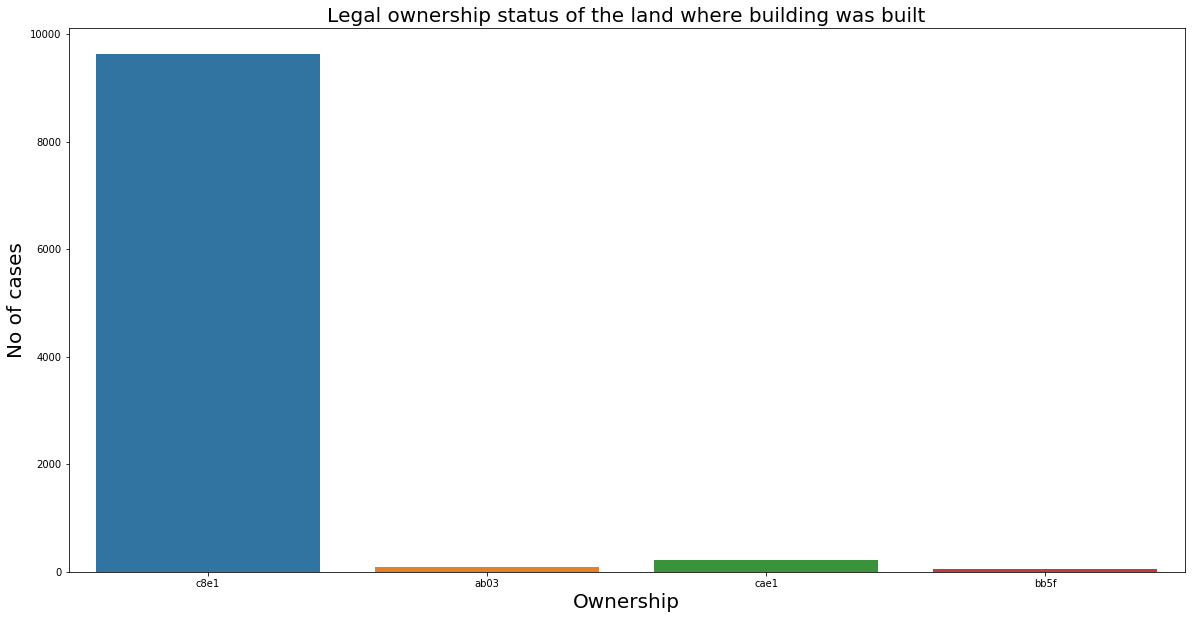

In [5]:
plt.figure(figsize=(20,10))
sns.countplot(df['legal_ownership_status'])
plt.xlabel('Ownership', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Legal ownership status of the land where building was built', size=20)

Text(0.5, 1.0, 'Number of families that live in the building')

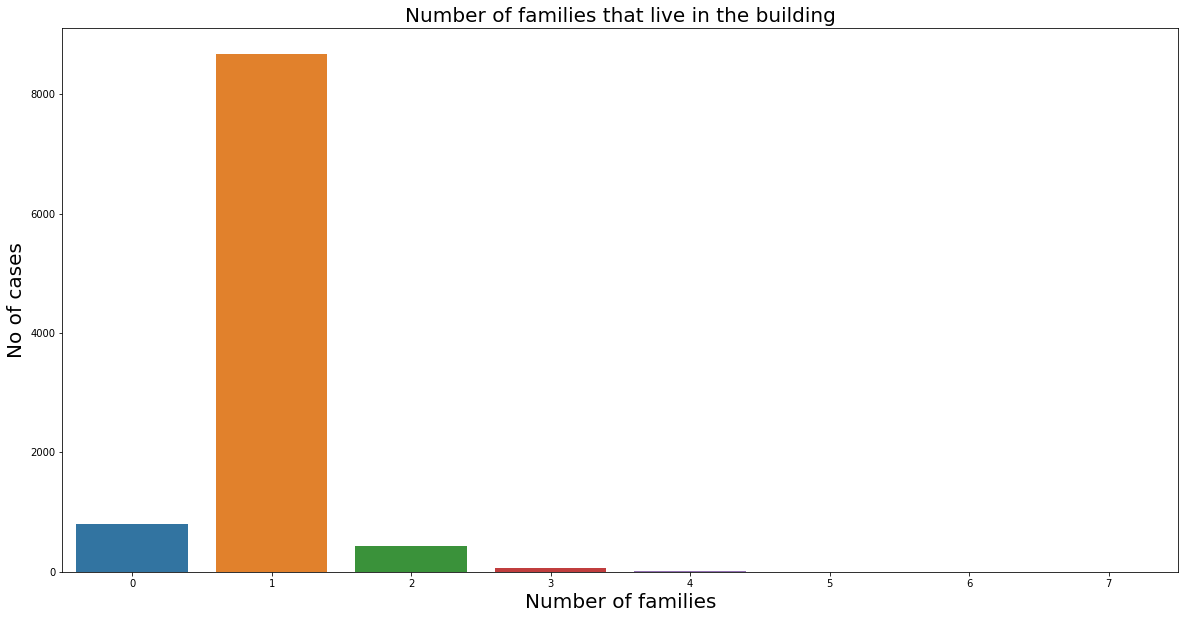

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(df['count_families'])
plt.xlabel('Number of families', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Number of families that live in the building', size=20)

## Insights check

In [52]:
#Drop NAs
#Check for any NAs
df.isnull().sum()
#No null values detected

Unnamed: 0                                0
building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area                                      0
height                                    0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

### Insight 1: Segment by relevant "info" versus Damage Type

Text(0.5, 1.0, '')

<Figure size 7200x2160 with 0 Axes>

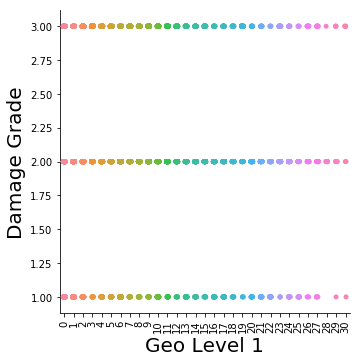

In [67]:
plt.figure(figsize=(100,30))
sns.catplot(x="geo_level_1_id", y='damage_grade', data=df);
plt.xticks(rotation='vertical')
plt.xlabel('Geo Level 1', size=20)
plt.ylabel('Damage Grade', size=20)
plt.title('', size=20)

Text(0.5, 1.0, '')

<Figure size 14400x720 with 0 Axes>

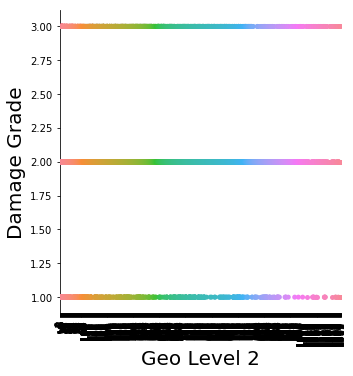

In [71]:
plt.figure(figsize=(200,10))
sns.catplot(x="geo_level_2_id", y='damage_grade', data=df);
plt.xticks(rotation='vertical')
plt.xlabel('Geo Level 2', size=20)
plt.ylabel('Damage Grade', size=20)
plt.title('', size=20)

Text(0.5, 1.0, '')

<Figure size 14400x720 with 0 Axes>

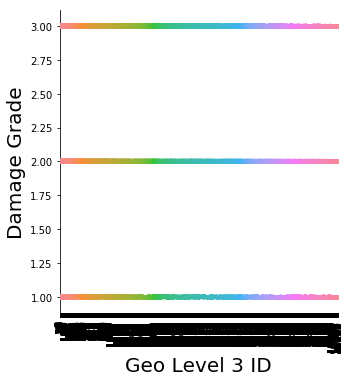

In [72]:
plt.figure(figsize=(200,10))
sns.catplot(x="geo_level_3_id", y='damage_grade', data=df);
plt.xticks(rotation='vertical')
plt.xlabel('Geo Level 3 ID', size=20)
plt.ylabel('Damage Grade', size=20)
plt.title('', size=20)

Text(0.5, 1.0, '')

<Figure size 14400x720 with 0 Axes>

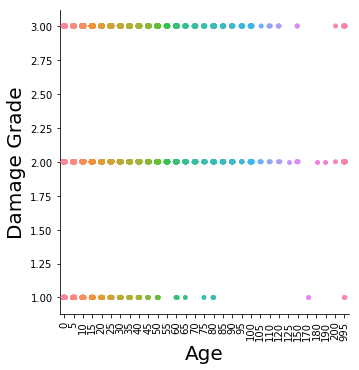

In [73]:
plt.figure(figsize=(200,10))
sns.catplot(x="age", y='damage_grade', data=df);
plt.xticks(rotation='vertical')
plt.xlabel('Age', size=20)
plt.ylabel('Damage Grade', size=20)
plt.title('', size=20)

Text(0.5, 1.0, '')

<Figure size 14400x720 with 0 Axes>

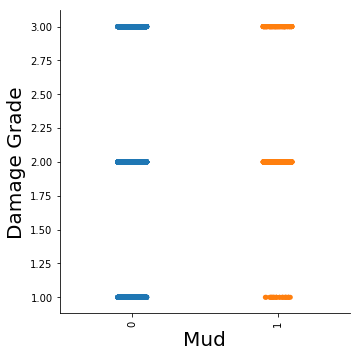

In [52]:
plt.figure(figsize=(200,10))
sns.catplot(x="has_superstructure_adobe_mud", y='damage_grade', data=df);
plt.xticks(rotation='vertical')
plt.xlabel('Mud', size=20)
plt.ylabel('Damage Grade', size=20)
plt.title('', size=20)

In [67]:
#Create a new dataframe to group 
grp = df.groupby(['damage_grade', 'has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone'], as_index=True) 

In [68]:
grp.count()

Unnamed: 0  \
damage_grade has_superstructure_adobe_mud has_superstructure_mud_mortar_stone               
1            0                            0                                           587   
                                          1                                           325   
             1                            0                                            19   
                                          1                                             7   
2            0                            0                                           951   
                                          1                                          4160   
             1                            0                                           343   
                                          1                                           182   
3            0                            0                                           229   
                                          1                                          2851   
             1                            0                                           245   
                                          1                                           101   

                                                                               building_id  \
damage_grade has_superstructure_adobe_mud has_superstructure_mud_mortar_stone                
1            0                            0                                            587   
                                          1                                            325   
             1                            0                                             19   
                                          1                                              7   
2            0                            0                                            951   
                                          1                                           4160   
             1                            0                                            343   
                                          1                                            182   
3            0                            0                                            229   
                                          1                                           2851   
             1                            0                                            245   
                                          1                                            101   

                                                                               geo_level_1_id  \
damage_grade has_superstructure_adobe_mud has_superstructure_mud_mortar_stone                   
1            0                            0                                               587   
                                          1                                               325   
             1                            0                                                19   
                                          1                                                 7   
2            0                            0                                               951   
                                          1                                              4160   
             1                            0                                               343   
                                          1                                               182   
3            0                            0                                               229   
                                          1                                              2851   
             1                            0                                               245   
                                          1                                               101   

                                                                               geo_level_2_id  \
dam

In [69]:
pd.DataFrame = grp.count()

In [70]:
newdf = pd.DataFrame

In [71]:
newdf

Unnamed: 0  \
damage_grade has_superstructure_adobe_mud has_superstructure_mud_mortar_stone               
1            0                            0                                           587   
                                          1                                           325   
             1                            0                                            19   
                                          1                                             7   
2            0                            0                                           951   
                                          1                                          4160   
             1                            0                                           343   
                                          1                                           182   
3            0                            0                                           229   
                                          1                                          2851   
             1                            0                                           245   
                                          1                                           101   

                                                                               building_id  \
damage_grade has_superstructure_adobe_mud has_superstructure_mud_mortar_stone                
1            0                            0                                            587   
                                          1                                            325   
             1                            0                                             19   
                                          1                                              7   
2            0                            0                                            951   
                                          1                                           4160   
             1                            0                                            343   
                                          1                                            182   
3            0                            0                                            229   
                                          1                                           2851   
             1                            0                                            245   
                                          1                                            101   

                                                                               geo_level_1_id  \
damage_grade has_superstructure_adobe_mud has_superstructure_mud_mortar_stone                   
1            0                            0                                               587   
                                          1                                               325   
             1                            0                                                19   
                                          1                                                 7   
2            0                            0                                               951   
                                          1                                              4160   
             1                            0                                               343   
                                          1                                               182   
3            0                            0                                               229   
                                          1                                              2851   
             1                            0                                               245   
                                          1                                               101   

                                                                               geo_level_2_id  \
dam

In [72]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, (1, 0, 0) to (3, 1, 1)
Data columns (total 38 columns):
Unnamed: 0                                12 non-null int64
building_id                               12 non-null int64
geo_level_1_id                            12 non-null int64
geo_level_2_id                            12 non-null int64
geo_level_3_id                            12 non-null int64
count_floors_pre_eq                       12 non-null int64
age                                       12 non-null int64
area                                      12 non-null int64
height                                    12 non-null int64
land_surface_condition                    12 non-null int64
foundation_type                           12 non-null int64
roof_type                                 12 non-null int64
ground_floor_type                         12 non-null int64
other_floor_type                          12 non-null int64
position                                  

## Insight 2: Correlation 

In [7]:
# See any correlation
df.corr()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,has_superstructure_adobe_mud,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
Unnamed: 0,1.000000,-0.005713,-0.002775,-0.017801,-0.006299,-0.000414,-0.006151,0.005957,-0.000310,-0.001545,...,0.006853,-0.011328,0.016373,-0.004800,-0.004274,0.005431,0.001673,-0.010623,-0.000631,-0.009897
building_id,-0.005713,1.000000,0.002878,-0.000947,-0.005004,-0.004498,0.006636,-0.001351,-0.006189,-0.000454,...,0.011886,-0.002585,0.004984,-0.012803,0.006151,-0.016625,0.003791,0.009496,0.003404,-0.008632
geo_level_1_id,-0.002775,0.002878,1.000000,0.494000,0.497065,0.019658,0.043637,0.022757,-0.017317,0.081308,...,-0.032699,-0.012626,-0.019405,-0.003006,-0.009707,-0.007124,0.023548,-0.006644,0.038454,-0.064084
geo_level_2_id,-0.017801,-0.000947,0.494000,1.000000,0.870383,-0.116855,0.004727,-0.074362,-0.131553,-0.184799,...,-0.069650,-0.050217,-0.009548,-0.006733,-0.012818,-0.004452,-0.006401,0.006553,0.027423,-0.006150
geo_level_3_id,-0.006299,-0.005004,0.497065,0.870383,1.000000,-0.089244,0.017500,-0.063940,-0.108456,-0.135954,...,-0.068820,-0.038971,-0.020463,-0.008539,-0.013161,-0.002374,-0.007778,0.002172,0.025573,-0.006001
count_floors_pre_eq,-0.000414,-0.004498,0.019658,-0.116855,-0.089244,1.000000,0.100241,0.110125,0.771249,0.191729,...,0.070644,0.043618,-0.005273,0.020401,-0.010441,0.006786,0.016390,0.011589,0.006032,0.112296
age,-0.006151,0.006636,0.043637,0.004727,0.017500,0.100241,1.000000,-0.003627,0.079549,0.082724,...,0.003528,-0.010992,-0.006905,-0.005732,-0.006207,-0.004473,-0.004473,0.001490,-0.007601,0.038219
area,0.005957,-0.001351,0.022757,-0.074362,-0.063940,0.110125,-0.003627,1.000000,0.211601,0.051889,...,0.148162,0.098480,0.017057,0.046395,0.015385,0.006360,0.038618,-0.003968,-0.003641,-0.114775
height,-0.000310,-0.006189,-0.017317,-0.131553,-0.108456,0.771249,0.079549,0.211601,1.000000,0.170447,...,0.126465,0.076386,0.017776,0.047302,-0.006362,0.006681,0.026405,0.007513,0.013356,0.031728
has_superstructure_adobe_mud,-0.001545,-0.000454,0.081308,-0.184799,-0.135954,0.191729,0.082724,0.051889,0.170447,1.000000,...,-0.013200,-0.003251,-0.008308,-0.008308,-0.008882,-0.004440,0.020308,-0.003139,-0.018094,0.055371


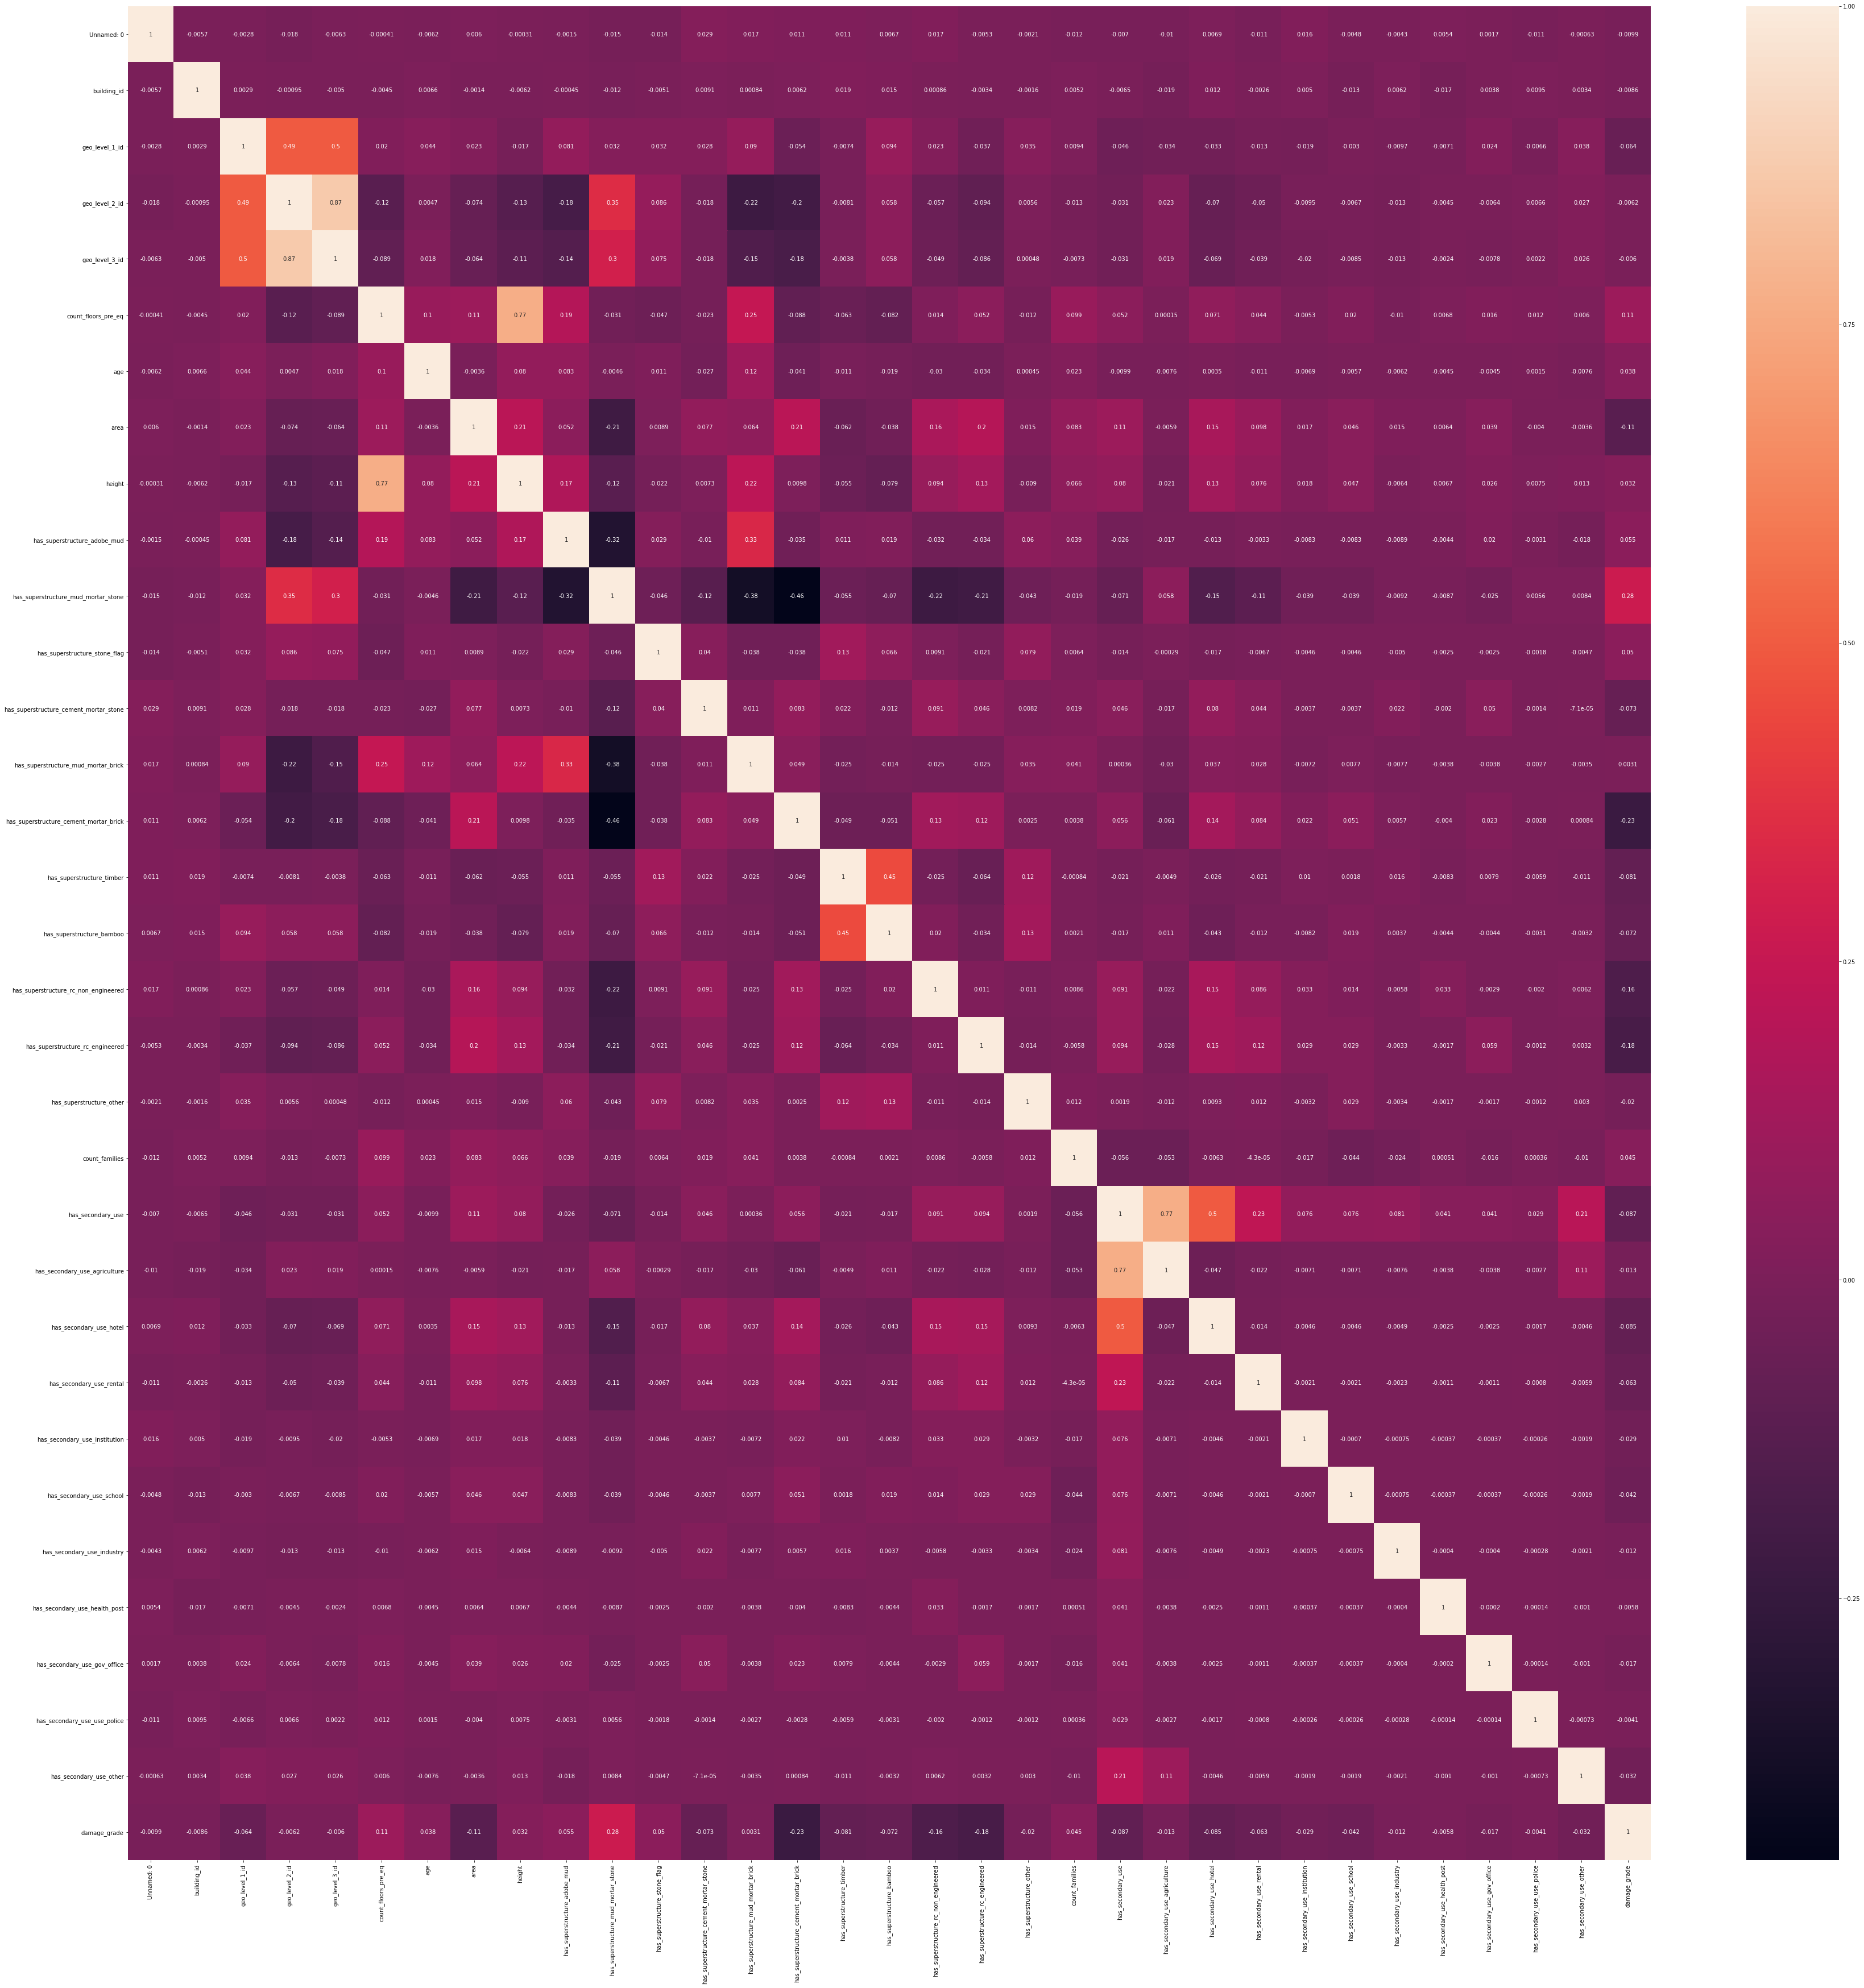

In [74]:
plt.figure(figsize=(60, 60))
sns.heatmap(df.corr(), annot=True)

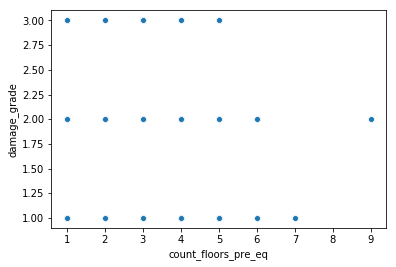

In [12]:
sns.scatterplot(x='count_floors_pre_eq',y='damage_grade',data=df)

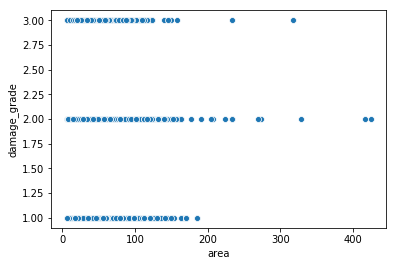

In [13]:
sns.scatterplot(x='area',y='damage_grade',data=df)

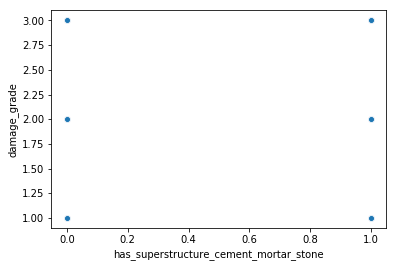

In [14]:
sns.scatterplot(x='has_superstructure_cement_mortar_stone',y='damage_grade',data=df)

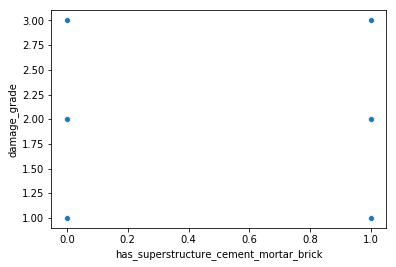

In [15]:
sns.scatterplot(x='has_superstructure_cement_mortar_brick',y='damage_grade',data=df)

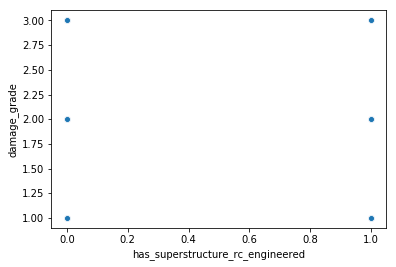

In [16]:
sns.scatterplot(x='has_superstructure_rc_engineered',y='damage_grade',data=df)

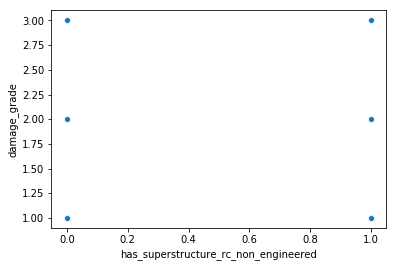

In [19]:
sns.scatterplot(x='has_superstructure_rc_non_engineered',y='damage_grade',data=df)

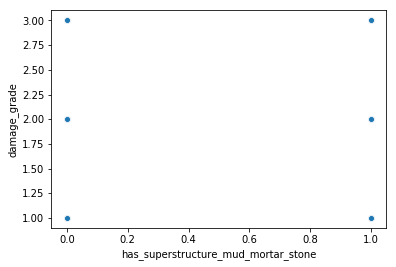

In [18]:
sns.scatterplot(x='has_superstructure_mud_mortar_stone',y='damage_grade',data=df)

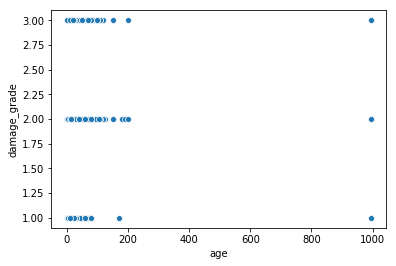

In [20]:
sns.scatterplot(x='age',y='damage_grade',data=df)

#### Based on correlation diagram: count_floors_pre_eq and has_superstructure_mud_mortar_stone has positive correlation with damage grade. In other words, floors 1 to 5 are most affected, and Mud Mortar - Stone is of softer material hence it cannot stand the great shaking.

#### For negative correlation: area, has_superstructure_cement_mortar_brick, has_superstructure_rc_non_engineered and has_superstructure_rc_engineered with Damage Grade. In other words, building made from Cement Mortar - Brick material tends to stand strong during earthquakes, and buildings that are reinforced concrete with or without engineering also less affected. Majority buildings less than 200 square feet area is most affected.

## Feature Selection

In [8]:
#Need to perform feature selection first
df3 = df[['count_floors_pre_eq','age','height','area','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 
          'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 
          'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 
          'count_families','damage_grade']]

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
count_floors_pre_eq                       10000 non-null int64
age                                       10000 non-null int64
height                                    10000 non-null int64
area                                      10000 non-null int64
has_superstructure_adobe_mud              10000 non-null int64
has_superstructure_mud_mortar_stone       10000 non-null int64
has_superstructure_stone_flag             10000 non-null int64
has_superstructure_cement_mortar_stone    10000 non-null int64
has_superstructure_mud_mortar_brick       10000 non-null int64
has_superstructure_cement_mortar_brick    10000 non-null int64
has_superstructure_timber                 10000 non-null int64
has_superstructure_bamboo                 10000 non-null int64
has_superstructure_rc_non_engineered      10000 non-null int64
has_superstructure_rc_engineered          10000 non-null int64
has_supers

In [10]:
df3.head()

,count_floors_pre_eq,age,height,area,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
0,2,25,4,33,0,1,0,0,0,0,0,0,0,0,0,1,2
1,3,15,5,28,0,1,0,0,0,0,0,0,0,0,0,0,3
2,1,20,2,37,0,1,0,0,1,0,0,0,0,0,0,1,2
3,2,5,3,18,0,1,0,0,0,0,0,0,0,0,0,1,2
4,3,0,6,39,0,1,0,0,0,0,0,0,0,0,0,1,3


### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## Damage Grade 3 Analysis

In [7]:
#Segment Damage Grade 3

(df3['damage_grade'] == 3).value_counts()

False    6574
True     3426
Name: damage_grade, dtype: int64

In [8]:
dmg3 = df3[(df3['damage_grade'] == 3)] ##Create a new dataframe dmg3(Damage Grade 3)

In [9]:
dmg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3426 entries, 1 to 9998
Data columns (total 17 columns):
count_floors_pre_eq                       3426 non-null int64
age                                       3426 non-null int64
height                                    3426 non-null int64
area                                      3426 non-null int64
has_superstructure_adobe_mud              3426 non-null int64
has_superstructure_mud_mortar_stone       3426 non-null int64
has_superstructure_stone_flag             3426 non-null int64
has_superstructure_cement_mortar_stone    3426 non-null int64
has_superstructure_mud_mortar_brick       3426 non-null int64
has_superstructure_cement_mortar_brick    3426 non-null int64
has_superstructure_timber                 3426 non-null int64
has_superstructure_bamboo                 3426 non-null int64
has_superstructure_rc_non_engineered      3426 non-null int64
has_superstructure_rc_engineered          3426 non-null int64
has_superstructure_other 

In [10]:
dmg3.corr()

,count_floors_pre_eq,age,height,area,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
count_floors_pre_eq,1.000000,0.067880,0.735427,0.134576,0.163983,-0.114494,-0.083598,-0.030534,0.207365,-0.018504,-0.039060,-0.044250,-0.005607,0.027122,-0.017320,0.149089,NaN
age,0.067880,1.000000,0.064629,0.020328,0.094578,-0.058143,0.021742,-0.015948,0.090245,-0.015283,-0.000544,-0.025443,-0.006423,-0.007033,-0.010003,-0.010642,NaN
height,0.735427,0.064629,1.000000,0.181087,0.182425,-0.143767,-0.025641,-0.014791,0.204487,0.017524,-0.017259,-0.032501,0.043297,0.055520,0.003033,0.091325,NaN
area,0.134576,0.020328,0.181087,1.000000,0.094743,-0.150053,0.019954,0.055883,0.075238,0.122546,0.000229,-0.004413,0.059848,0.044081,0.038602,0.097140,NaN
has_superstructure_adobe_mud,0.163983,0.094578,0.182425,0.094743,1.000000,-0.553068,-0.011732,-0.015692,0.352448,0.002110,0.055595,0.071217,0.000560,-0.008100,0.097466,0.020001,NaN
has_superstructure_mud_mortar_stone,-0.114494,-0.058143,-0.143767,-0.150053,-0.553068,1.000000,-0.113046,-0.111992,-0.504831,-0.228913,-0.066706,-0.092082,-0.028722,-0.060314,-0.094851,-0.016648,NaN
has_superstructure_stone_flag,-0.083598,0.021742,-0.025641,0.019954,-0.011732,-0.113046,1.000000,0.020685,-0.050502,-0.023609,0.129572,0.071392,0.007110,-0.004838,0.110107,-0.008538,NaN
has_superstructure_cement_mortar_stone,-0.030534,-0.015948,-0.014791,0.055883,-0.015692,-0.111992,0.020685,1.000000,0.024470,0.143949,0.027198,-0.005582,0.092260,0.145996,-0.009485,-0.033824,NaN
has_superstructure_mud_mortar_brick,0.207365,0.090245,0.204487,0.075238,0.352448,-0.504831,-0.050502,0.024470,1.000000,0.054884,0.022379,0.040529,0.007730,0.044852,0.035749,0.018128,NaN
has_superstructure_cement_mortar_brick,-0.018504,-0.015283,0.017524,0.122546,0.002110,-0.228913,-0.023609,0.143949,0.054884,1.000000,0.006213,-0.008468,0.058306,-0.002850,-0.013606,0.004949,NaN


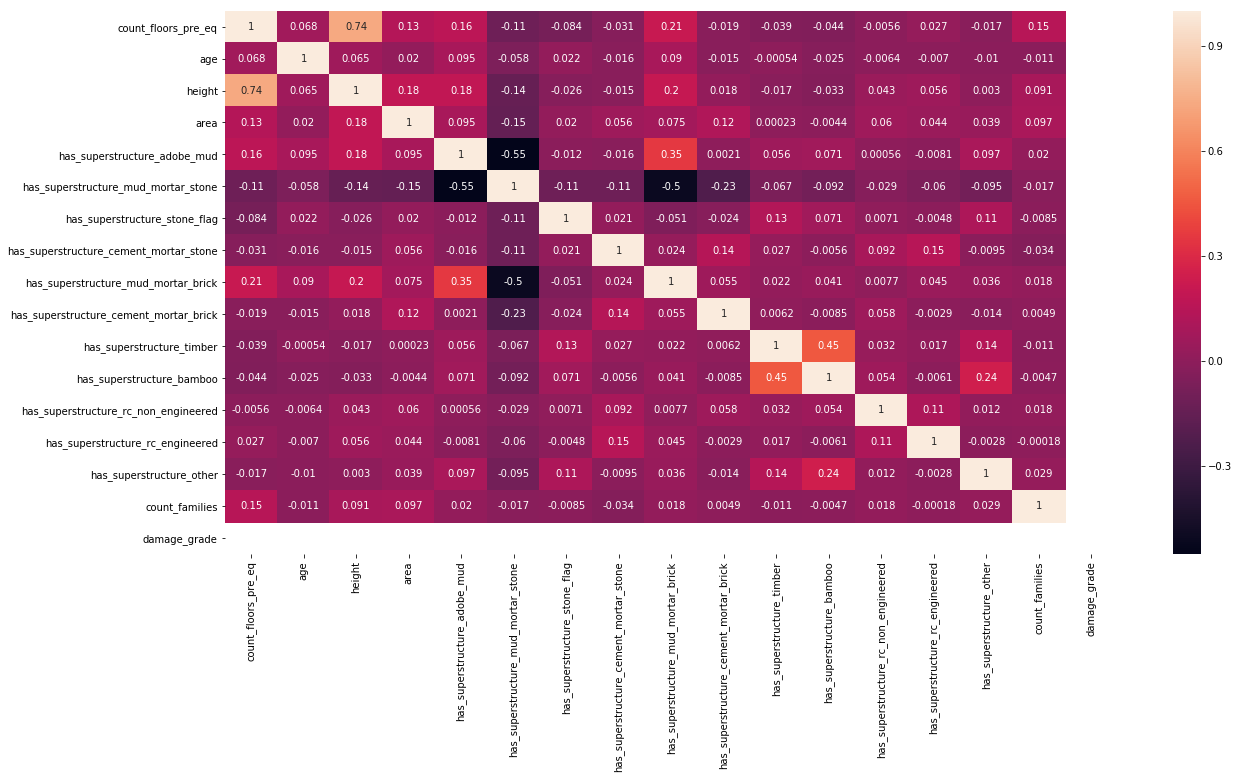

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(dmg3.corr(),annot=True)

In [12]:
dmg3.describe()

,count_floors_pre_eq,age,height,area,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.0
mean,2.215995,26.301810,4.689726,36.236719,0.100992,0.861646,0.038529,0.006713,0.059837,0.013719,0.212493,0.059545,0.011384,0.000584,0.013135,1.003211,3.0
std,0.698729,56.028913,1.658878,17.691806,0.301363,0.345321,0.192497,0.081672,0.237218,0.116337,0.409131,0.236676,0.106100,0.024158,0.113869,0.430571,0.0
min,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,2.000000,10.000000,4.000000,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
50%,2.000000,20.000000,5.000000,32.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
75%,3.000000,30.000000,6.000000,42.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
max,5.000000,995.000000,30.000000,318.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.0


In [3]:
#dmg3['count_floors_pre_eq'].value_counts(sort=True)

In [4]:
#dmg3['age'].value_counts(sort=True)

In [5]:
#dmg3['height'].value_counts(sort=True)

In [6]:
#dmg3['area'].value_counts(sort=True)

In [17]:
dmg3['has_superstructure_adobe_mud'].value_counts()

0    3080
1     346
Name: has_superstructure_adobe_mud, dtype: int64

In [18]:
dmg3['has_superstructure_mud_mortar_stone'].value_counts(sort=True)

1    2952
0     474
Name: has_superstructure_mud_mortar_stone, dtype: int64

In [19]:
dmg3['has_superstructure_stone_flag'].value_counts(sort=True)

0    3294
1     132
Name: has_superstructure_stone_flag, dtype: int64

In [20]:
dmg3['has_superstructure_cement_mortar_stone'].value_counts(sort=True)

0    3403
1      23
Name: has_superstructure_cement_mortar_stone, dtype: int64

In [21]:
dmg3['has_superstructure_mud_mortar_brick'].value_counts(sort=True)

0    3221
1     205
Name: has_superstructure_mud_mortar_brick, dtype: int64

In [79]:
dmg3['has_superstructure_cement_mortar_brick'].value_counts(sort=True)

0    3379
1      47
Name: has_superstructure_cement_mortar_brick, dtype: int64

In [22]:
dmg3['has_superstructure_timber'].value_counts(sort=True)

0    2698
1     728
Name: has_superstructure_timber, dtype: int64

In [23]:
dmg3['has_superstructure_bamboo'].value_counts(sort=True)

0    3222
1     204
Name: has_superstructure_bamboo, dtype: int64

In [24]:
dmg3['has_superstructure_rc_non_engineered'].value_counts(sort=True)

0    3387
1      39
Name: has_superstructure_rc_non_engineered, dtype: int64

In [25]:
dmg3['has_superstructure_rc_engineered'].value_counts(sort=True)

0    3424
1       2
Name: has_superstructure_rc_engineered, dtype: int64

In [26]:
dmg3['has_superstructure_other'].value_counts(sort=True)

0    3381
1      45
Name: has_superstructure_other, dtype: int64

In [38]:
#dmg3['count_families'].value_counts(sort=True)

Text(0.5, 0.98, 'Building materials distribution in almost complete earthquake destruction (Grade 3)')

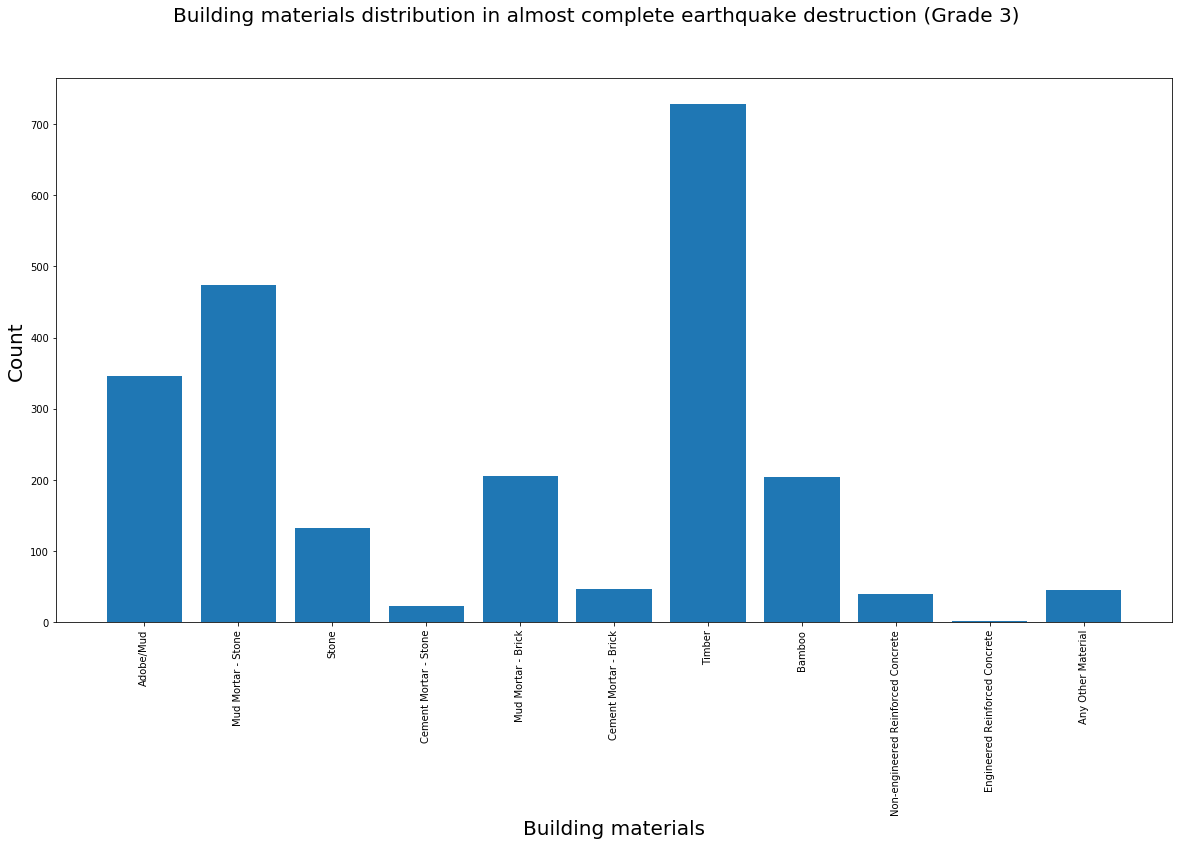

In [10]:
data = {'Adobe/Mud': 346, 'Mud Mortar - Stone': 474, 'Stone': 132, 'Cement Mortar - Stone': 23, 
        'Mud Mortar - Brick': 205, 'Cement Mortar - Brick': 47, 'Timber': 728, 'Bamboo': 204,
        'Non-engineered Reinforced Concrete': 39, 'Engineered Reinforced Concrete': 2,
        'Any Other Material': 45 }
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, figsize=(20, 10))
axs.bar(names, values)
plt.xticks(rotation=90)
plt.xlabel("Building materials", fontsize=20)
plt.ylabel("Count", fontsize=20)
fig.suptitle('Building materials distribution in almost complete earthquake destruction (Grade 3)', fontsize=20)

## Damage Grade 2 Analysis

In [11]:
#Segment Damage Grade 2

(df3['damage_grade'] == 2).value_counts()

True     5636
False    4364
Name: damage_grade, dtype: int64

In [16]:
dmg2 = df3[(df3['damage_grade'] == 2)] ##Create a new dataframe dmg3(Damage Grade 2)

In [17]:
dmg2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5636 entries, 0 to 9999
Data columns (total 17 columns):
count_floors_pre_eq                       5636 non-null int64
age                                       5636 non-null int64
height                                    5636 non-null int64
area                                      5636 non-null int64
has_superstructure_adobe_mud              5636 non-null int64
has_superstructure_mud_mortar_stone       5636 non-null int64
has_superstructure_stone_flag             5636 non-null int64
has_superstructure_cement_mortar_stone    5636 non-null int64
has_superstructure_mud_mortar_brick       5636 non-null int64
has_superstructure_cement_mortar_brick    5636 non-null int64
has_superstructure_timber                 5636 non-null int64
has_superstructure_bamboo                 5636 non-null int64
has_superstructure_rc_non_engineered      5636 non-null int64
has_superstructure_rc_engineered          5636 non-null int64
has_superstructure_other 

In [18]:
dmg2.corr()

,count_floors_pre_eq,age,height,area,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
count_floors_pre_eq,1.000000,0.110015,0.769052,0.106420,0.218516,-0.087680,-0.040429,-0.009420,0.302287,-0.061046,-0.055749,-0.089291,0.026168,0.037557,0.004434,0.079771,NaN
age,0.110015,1.000000,0.093706,-0.005900,0.066044,-0.026319,0.002486,-0.025488,0.120063,-0.027943,-0.019122,-0.020911,-0.021982,-0.020440,0.012060,0.044804,NaN
height,0.769052,0.093706,1.000000,0.204282,0.192358,-0.151767,-0.025440,0.018964,0.262355,0.028305,-0.044975,-0.088587,0.096894,0.089096,-0.002970,0.056459,NaN
area,0.106420,-0.005900,0.204282,1.000000,0.057750,-0.180970,0.014897,0.074679,0.075327,0.213674,-0.043534,-0.027343,0.130357,0.131452,0.007484,0.086643,NaN
has_superstructure_adobe_mud,0.218516,0.066044,0.192358,0.057750,1.000000,-0.322911,0.047167,-0.000446,0.335823,-0.018366,-0.003079,0.001322,-0.023862,-0.019825,0.050517,0.050163,NaN
has_superstructure_mud_mortar_stone,-0.087680,-0.026319,-0.151767,-0.180970,-0.322911,1.000000,-0.050008,-0.110035,-0.427483,-0.480298,-0.042153,-0.046419,-0.197259,-0.144819,-0.020546,-0.049805,NaN
has_superstructure_stone_flag,-0.040429,0.002486,-0.025440,0.014897,0.047167,-0.050008,1.000000,0.058455,-0.035312,-0.038260,0.148396,0.073882,0.028075,-0.014544,0.065533,0.012727,NaN
has_superstructure_cement_mortar_stone,-0.009420,-0.025488,0.018964,0.074679,-0.000446,-0.110035,0.058455,1.000000,0.010980,0.056458,0.028664,-0.015634,0.092447,0.071491,0.003571,0.047605,NaN
has_superstructure_mud_mortar_brick,0.302287,0.120063,0.262355,0.075327,0.335823,-0.427483,-0.035312,0.010980,1.000000,0.083695,-0.045482,-0.037581,-0.028922,-0.025025,0.035995,0.059624,NaN
has_superstructure_cement_mortar_brick,-0.061046,-0.027943,0.028305,0.213674,-0.018366,-0.480298,-0.038260,0.056458,0.083695,1.000000,-0.042341,-0.050660,0.134761,0.132773,0.008037,0.015927,NaN


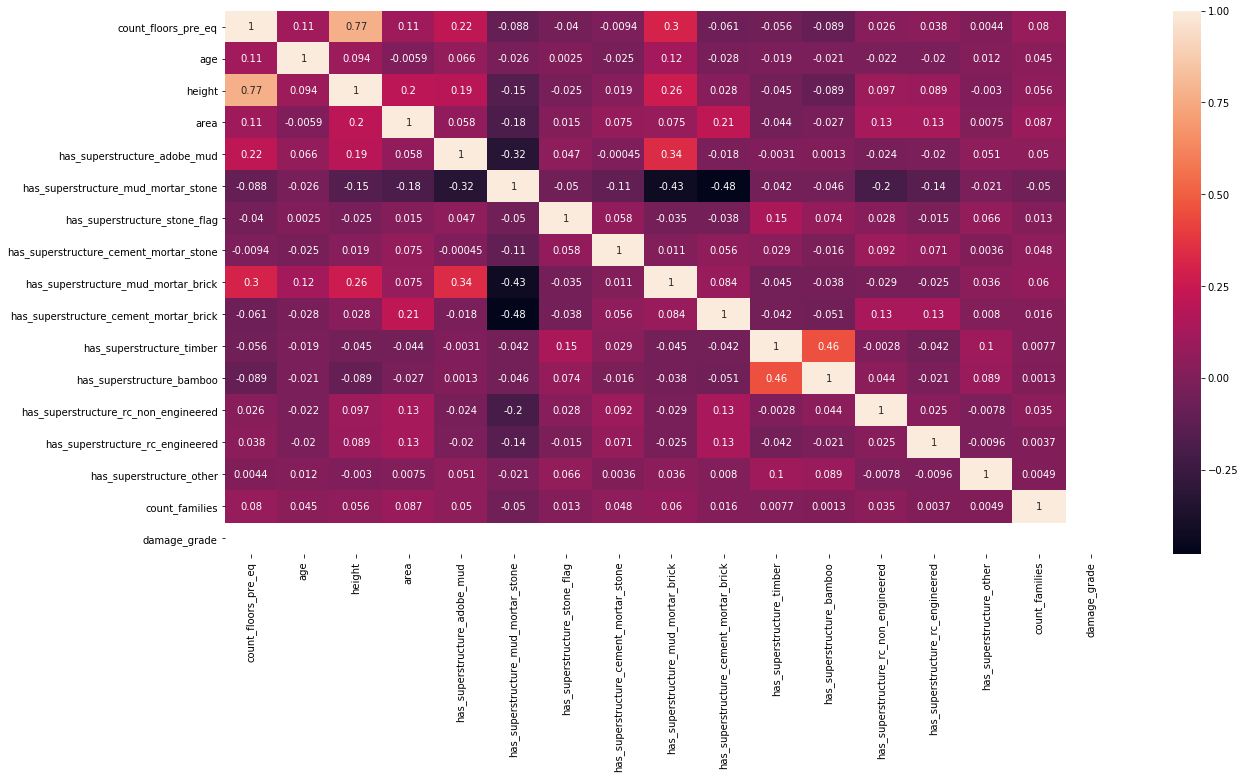

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(dmg2.corr(),annot=True)

In [20]:
dmg2.describe()

,count_floors_pre_eq,age,height,area,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
count,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.0
mean,2.152236,26.965046,4.670334,38.464336,0.093151,0.770405,0.028744,0.023066,0.080554,0.078247,0.270937,0.099716,0.041519,0.007097,0.012775,0.982434,2.0
std,0.726649,71.211486,1.736373,21.442355,0.290670,0.420610,0.167100,0.150126,0.272172,0.268584,0.444483,0.299648,0.199505,0.083953,0.112312,0.404338,0.0
min,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,2.000000,10.000000,4.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
50%,2.000000,17.500000,5.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
75%,2.000000,30.000000,5.000000,44.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
max,9.000000,995.000000,15.000000,425.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,2.0


In [ ]:
#dmg2['count_floors_pre_eq'].value_counts(sort=True)

In [ ]:
#dmg2['age'].value_counts(sort=True)

In [ ]:
#dmg2['height'].value_counts(sort=True)

In [ ]:
#dmg2['area'].value_counts(sort=True)

In [21]:
dmg2['has_superstructure_adobe_mud'].value_counts()

0    5111
1     525
Name: has_superstructure_adobe_mud, dtype: int64

In [22]:
dmg2['has_superstructure_mud_mortar_stone'].value_counts(sort=True)

1    4342
0    1294
Name: has_superstructure_mud_mortar_stone, dtype: int64

In [23]:
dmg2['has_superstructure_stone_flag'].value_counts(sort=True)

0    5474
1     162
Name: has_superstructure_stone_flag, dtype: int64

In [24]:
dmg2['has_superstructure_cement_mortar_stone'].value_counts(sort=True)

0    5506
1     130
Name: has_superstructure_cement_mortar_stone, dtype: int64

In [25]:
dmg2['has_superstructure_mud_mortar_brick'].value_counts(sort=True)

0    5182
1     454
Name: has_superstructure_mud_mortar_brick, dtype: int64

In [26]:
dmg2['has_superstructure_cement_mortar_brick'].value_counts(sort=True)

0    5195
1     441
Name: has_superstructure_cement_mortar_brick, dtype: int64

In [27]:
dmg2['has_superstructure_timber'].value_counts(sort=True)

0    4109
1    1527
Name: has_superstructure_timber, dtype: int64

In [28]:
dmg2['has_superstructure_bamboo'].value_counts(sort=True)

0    5074
1     562
Name: has_superstructure_bamboo, dtype: int64

In [29]:
dmg2['has_superstructure_rc_non_engineered'].value_counts(sort=True)

0    5402
1     234
Name: has_superstructure_rc_non_engineered, dtype: int64

In [30]:
dmg2['has_superstructure_rc_engineered'].value_counts(sort=True)

0    5596
1      40
Name: has_superstructure_rc_engineered, dtype: int64

In [31]:
dmg2['has_superstructure_other'].value_counts(sort=True)

0    5564
1      72
Name: has_superstructure_other, dtype: int64

In [32]:
#dmg2['count_families'].value_counts(sort=True)

Text(0.5, 0.98, 'Building materials distribution in medium amount damage (Grade 2)')

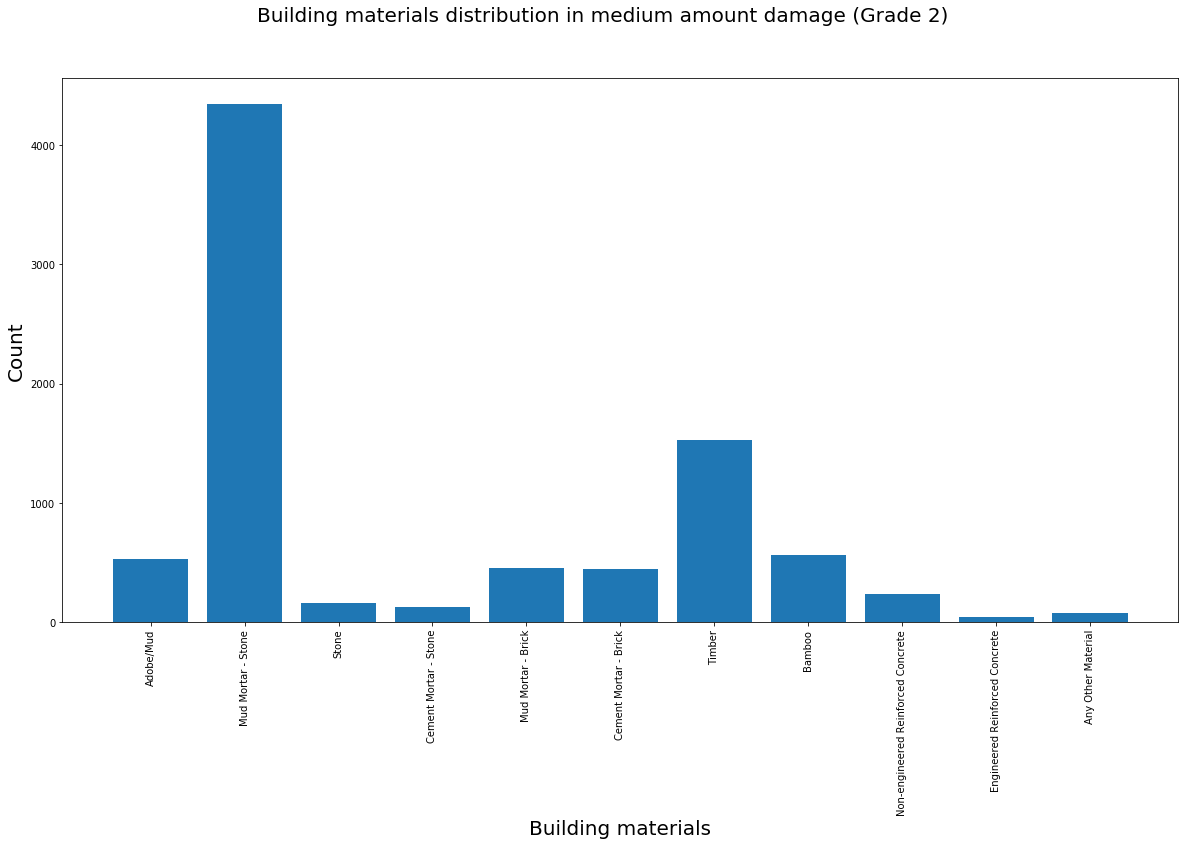

In [9]:
data2 = {'Adobe/Mud': 525, 'Mud Mortar - Stone': 4342, 'Stone': 162, 'Cement Mortar - Stone': 130, 
        'Mud Mortar - Brick': 454, 'Cement Mortar - Brick': 441, 'Timber': 1527, 'Bamboo': 562,
        'Non-engineered Reinforced Concrete': 234, 'Engineered Reinforced Concrete': 40,
        'Any Other Material': 72 }
names = list(data2.keys())
values = list(data2.values())
fig, axs = plt.subplots(1, figsize=(20, 10))
axs.bar(names, values)
plt.xticks(rotation=90)
plt.xlabel("Building materials", fontsize=20)
plt.ylabel("Count", fontsize=20)
fig.suptitle('Building materials distribution in medium amount damage (Grade 2)', fontsize=20)

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Damage Grade 1 Analysis

In [39]:
#Segment Damage Grade 1

(df3['damage_grade'] == 1).value_counts()

False    9062
True      938
Name: damage_grade, dtype: int64

In [40]:
dmg1 = df3[(df3['damage_grade'] == 1)] ##Create a new dataframe dmg3(Damage Grade 1)

In [41]:
dmg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 16 to 9990
Data columns (total 17 columns):
count_floors_pre_eq                       938 non-null int64
age                                       938 non-null int64
height                                    938 non-null int64
area                                      938 non-null int64
has_superstructure_adobe_mud              938 non-null int64
has_superstructure_mud_mortar_stone       938 non-null int64
has_superstructure_stone_flag             938 non-null int64
has_superstructure_cement_mortar_stone    938 non-null int64
has_superstructure_mud_mortar_brick       938 non-null int64
has_superstructure_cement_mortar_brick    938 non-null int64
has_superstructure_timber                 938 non-null int64
has_superstructure_bamboo                 938 non-null int64
has_superstructure_rc_non_engineered      938 non-null int64
has_superstructure_rc_engineered          938 non-null int64
has_superstructure_other               

In [42]:
dmg1.corr()

,count_floors_pre_eq,age,height,area,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
count_floors_pre_eq,1.000000,0.072296,0.876061,0.209533,0.042927,0.037599,-0.022372,-0.018212,0.000362,-0.097634,-0.088794,-0.083292,0.119741,0.237027,-0.036841,0.012051,NaN
age,0.072296,1.000000,0.027483,0.025833,0.174000,0.083137,-0.005649,-0.035762,0.147641,-0.065868,0.060333,0.038044,-0.045625,-0.049139,-0.019818,-0.037441,NaN
height,0.876061,0.027483,1.000000,0.324574,-0.004783,-0.091654,-0.018342,0.005830,-0.005156,0.006449,-0.161201,-0.118382,0.179011,0.314969,-0.041149,0.035323,NaN
area,0.209533,0.025833,0.324574,1.000000,-0.014002,-0.255185,0.017923,0.067269,0.022089,0.190148,-0.332686,-0.190246,0.222456,0.327133,-0.020713,0.093633,NaN
has_superstructure_adobe_mud,0.042927,0.174000,-0.004783,-0.014002,1.000000,-0.029912,0.166010,-0.034216,0.044877,-0.083231,-0.034378,-0.001543,-0.066816,-0.057012,0.013768,0.010846,NaN
has_superstructure_mud_mortar_stone,0.037599,0.083137,-0.091654,-0.255185,-0.029912,1.000000,0.007051,-0.115633,-0.067805,-0.394462,0.069870,-0.029595,-0.266839,-0.249926,0.021254,-0.025317,NaN
has_superstructure_stone_flag,-0.022372,-0.005649,-0.018342,0.017923,0.166010,0.007051,1.000000,0.060382,-0.013076,0.024821,0.042748,0.063836,0.013823,-0.024719,0.080863,0.010372,NaN
has_superstructure_cement_mortar_stone,-0.018212,-0.035762,0.005830,0.067269,-0.034216,-0.115633,0.060382,1.000000,-0.004554,0.071230,-0.047550,-0.040329,0.047869,-0.014217,0.036535,0.006654,NaN
has_superstructure_mud_mortar_brick,0.000362,0.147641,-0.005156,0.022089,0.044877,-0.067805,-0.013076,-0.004554,1.000000,-0.047161,-0.045462,-0.027301,-0.034679,-0.039991,0.049071,-0.011899,NaN
has_superstructure_cement_mortar_brick,-0.097634,-0.065868,0.006449,0.190148,-0.083231,-0.394462,0.024821,0.071230,-0.047161,1.000000,-0.258068,-0.190235,-0.000635,0.006023,-0.032070,0.032979,NaN


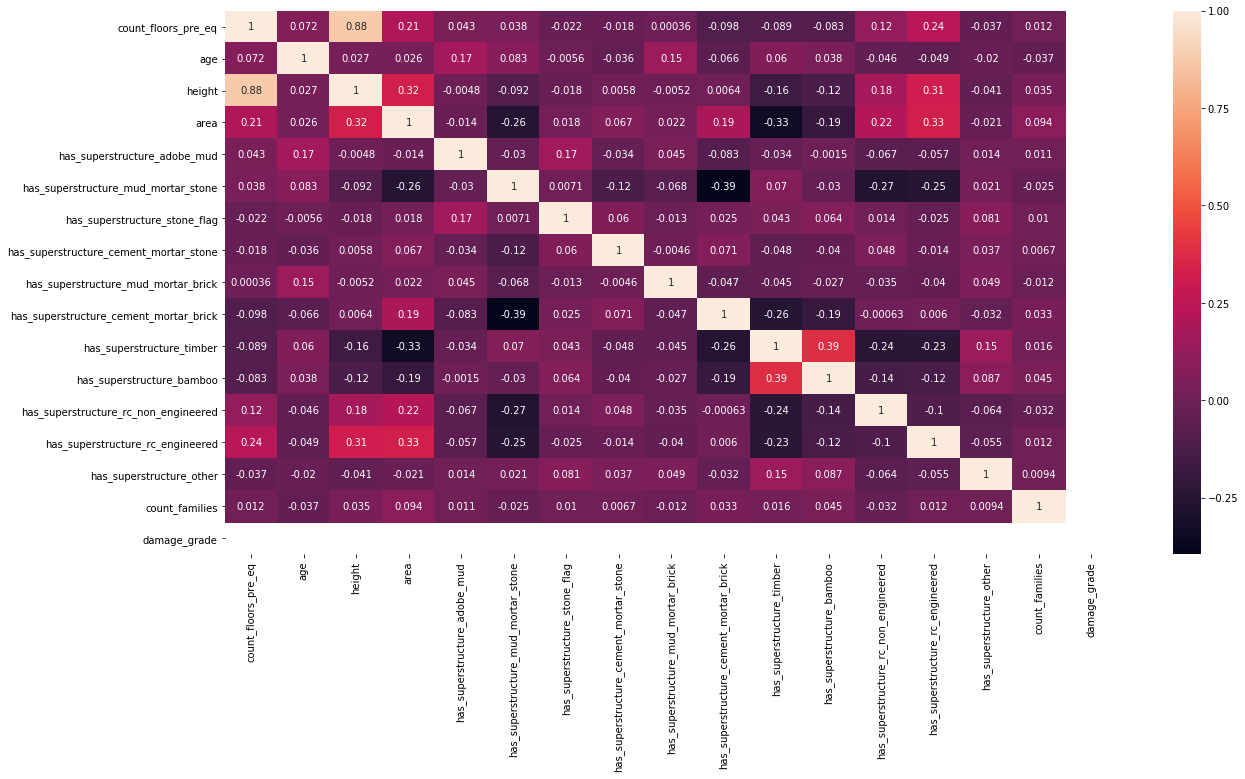

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(dmg1.corr(),annot=True)

In [ ]:
#dmg1['count_floors_pre_eq'].value_counts(sort=True)

In [ ]:
#dmg1['age'].value_counts(sort=True)

In [ ]:
#dmg1['height'].value_counts(sort=True)

In [ ]:
#dmg1['area'].value_counts(sort=True)

In [44]:
dmg1['has_superstructure_adobe_mud'].value_counts()

0    912
1     26
Name: has_superstructure_adobe_mud, dtype: int64

In [45]:
dmg1['has_superstructure_mud_mortar_stone'].value_counts(sort=True)

0    606
1    332
Name: has_superstructure_mud_mortar_stone, dtype: int64

In [46]:
dmg1['has_superstructure_stone_flag'].value_counts(sort=True)

0    933
1      5
Name: has_superstructure_stone_flag, dtype: int64

In [47]:
dmg1['has_superstructure_cement_mortar_stone'].value_counts(sort=True)

0    901
1     37
Name: has_superstructure_cement_mortar_stone, dtype: int64

In [48]:
dmg1['has_superstructure_mud_mortar_brick'].value_counts(sort=True)

0    909
1     29
Name: has_superstructure_mud_mortar_brick, dtype: int64

In [49]:
dmg1['has_superstructure_cement_mortar_brick'].value_counts(sort=True)

0    701
1    237
Name: has_superstructure_cement_mortar_brick, dtype: int64

In [50]:
dmg1['has_superstructure_timber'].value_counts(sort=True)

0    632
1    306
Name: has_superstructure_timber, dtype: int64

In [51]:
dmg1['has_superstructure_bamboo'].value_counts(sort=True)

0    827
1    111
Name: has_superstructure_bamboo, dtype: int64

In [52]:
dmg1['has_superstructure_rc_non_engineered'].value_counts(sort=True)

0    811
1    127
Name: has_superstructure_rc_non_engineered, dtype: int64

In [53]:
dmg1['has_superstructure_rc_engineered'].value_counts(sort=True)

0    842
1     96
Name: has_superstructure_rc_engineered, dtype: int64

In [54]:
dmg1['has_superstructure_other'].value_counts(sort=True)

0    914
1     24
Name: has_superstructure_other, dtype: int64

In [55]:
#dmg1['count_families'].value_counts(sort=True)

Text(0.5, 0.98, 'Building materials distribution in low damage (Grade 1)')

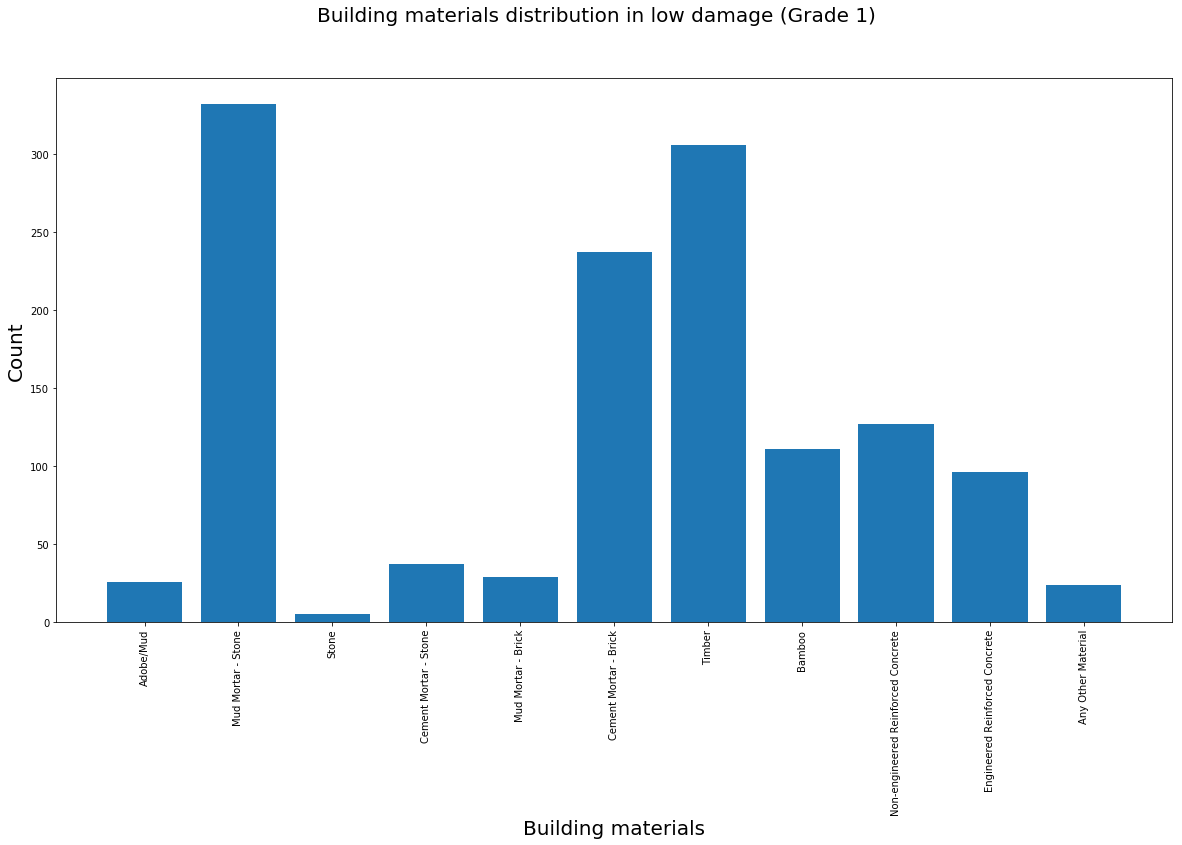

In [8]:
data3 = {'Adobe/Mud': 26, 'Mud Mortar - Stone': 332, 'Stone': 5, 'Cement Mortar - Stone': 37, 
        'Mud Mortar - Brick': 29, 'Cement Mortar - Brick': 237, 'Timber': 306, 'Bamboo': 111,
        'Non-engineered Reinforced Concrete': 127, 'Engineered Reinforced Concrete': 96,
        'Any Other Material': 24 }
names = list(data3.keys())
values = list(data3.values())
fig, axs = plt.subplots(1, figsize=(20, 10))
axs.bar(names, values)
plt.xticks(rotation=90)
plt.xlabel("Building materials", fontsize=20)
plt.ylabel("Count", fontsize=20)
fig.suptitle('Building materials distribution in low damage (Grade 1)', fontsize=20)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [84]:
#Need to perform feature selection first
df4 = df[['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 
          'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 
          'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 
          'damage_grade']]

In [85]:
df4.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,0,1,0,0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,0,0,3
2,0,1,0,0,1,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,0,0,0,0,2
4,0,1,0,0,0,0,0,0,0,0,0,3


In [86]:
df4['Count'] = df4.groupby('damage_grade')['damage_grade'].transform('count') #Create a new Count column

In [87]:
df4.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,Count
0,0,1,0,0,0,0,0,0,0,0,0,2,5636
1,0,1,0,0,0,0,0,0,0,0,0,3,3426
2,0,1,0,0,1,0,0,0,0,0,0,2,5636
3,0,1,0,0,0,0,0,0,0,0,0,2,5636
4,0,1,0,0,0,0,0,0,0,0,0,3,3426


In [88]:
df4.shape

(10000, 13)

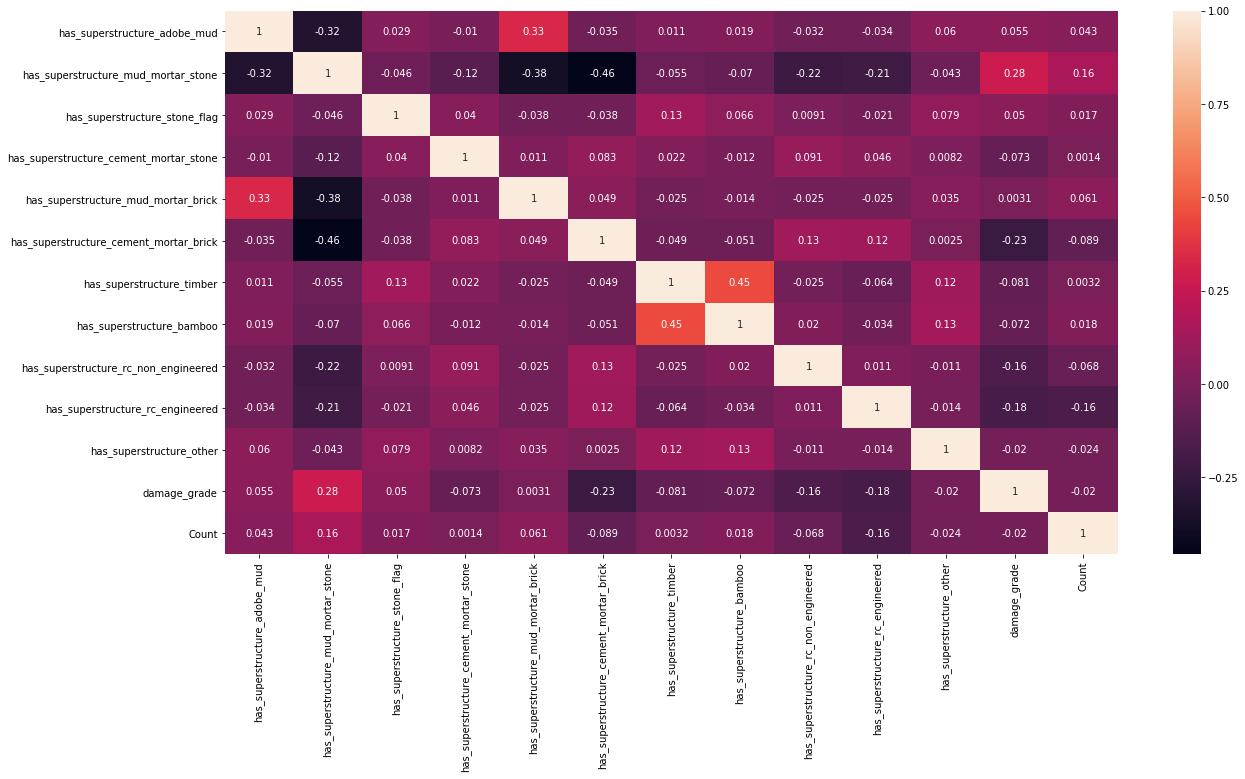

In [89]:
plt.figure(figsize=(20,10))
sns.heatmap(df4.corr(),annot=True)

In [101]:
df4['has_superstructure_adobe_mud'].value_counts()

0    9103
1     897
Name: has_superstructure_adobe_mud, dtype: int64

In [103]:
#import dexplot as dxp

In [102]:
#dxp.aggplot(agg='Count', groupby='damage_grade', data=df4, hue='has_superstructure_adobe_mud')

In [107]:
#plt.figure(figsize=(20,10))
#sns.heatmap(df4)

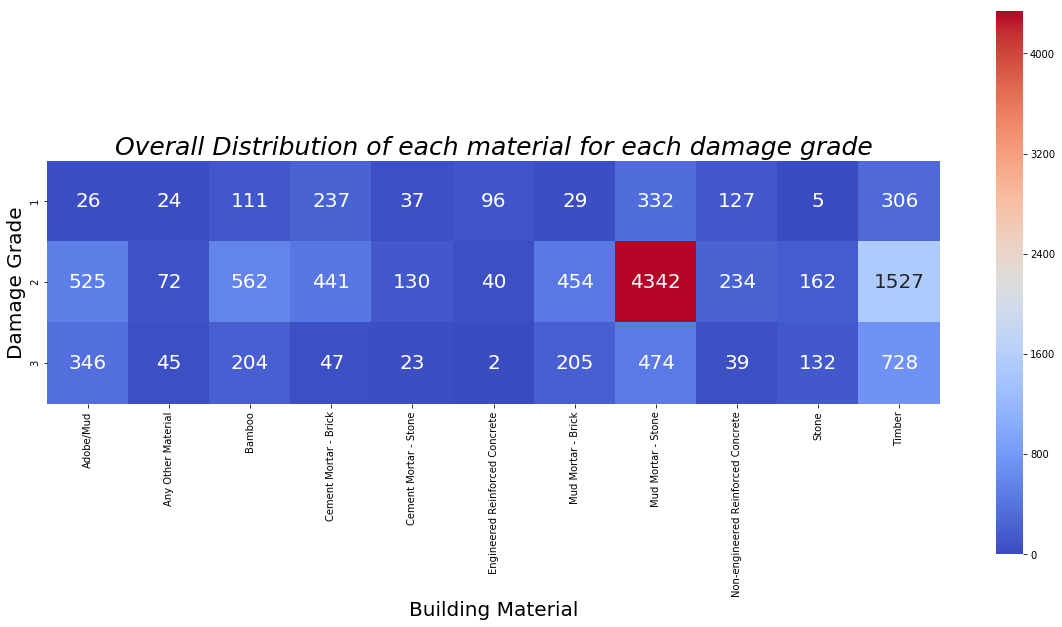

In [7]:
# heat map

df = pd.DataFrame(dict(damage_grade=[ '1', '2', '3',
                                      '1', '2', '3',
                                      '1', '2', '3',
                                      '1', '2', '3',
                                      '1', '2', '3',
                                      '1', '2', '3',
                                      '1', '2', '3',
                                      '1', '2', '3',
                                      '1', '2', '3',
                                      '1', '2', '3',
                                      '1', '2', '3'                           
                                    ], 
                  building_material=['Adobe/Mud','Adobe/Mud','Adobe/Mud',
                                 'Mud Mortar - Stone','Mud Mortar - Stone','Mud Mortar - Stone',
                                 'Stone','Stone','Stone',
                                 'Cement Mortar - Stone','Cement Mortar - Stone','Cement Mortar - Stone',
                                 'Mud Mortar - Brick','Mud Mortar - Brick','Mud Mortar - Brick',
                                 'Cement Mortar - Brick','Cement Mortar - Brick','Cement Mortar - Brick',
                                 'Timber','Timber','Timber',
                                 'Bamboo','Bamboo','Bamboo',
                                 'Non-engineered Reinforced Concrete','Non-engineered Reinforced Concrete','Non-engineered Reinforced Concrete',
                                 'Engineered Reinforced Concrete','Engineered Reinforced Concrete','Engineered Reinforced Concrete',
                                 'Any Other Material','Any Other Material','Any Other Material'                               
                                  ], 
                  value=[26,525,346,332,4342,474,5,162,132,37,130,23,29,454,205,237,441,47,306,1527,728,111,562,204,127,234,39,96,40,2,24,72,45]))
pivot_table = df.pivot("damage_grade", "building_material", "value")

# try printing out pivot_table to see what it looks like!

fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(data=pivot_table, 
            cmap='coolwarm',
            ax=ax, annot=True, annot_kws={"size": 20},fmt=".0f",cbar=True,square=True)
plt.xlabel('Building Material',size=20)
plt.ylabel('Damage Grade', size=20)
plt.title("Overall Distribution of each material for each damage grade", fontsize = 25, color='Black', fontstyle='italic')
plt.show()